# HR_Attrition_Analysis

Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



In [280]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [203]:
#Loading the dataset
df=pd.read_excel('HR-Employee-attrition.xlsx')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [204]:
df.head(15)

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Travel_Rarely        670  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
14   28       Yes      Travel_Rarely        103  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                  1          2  Life Sciences              1               1   
1                  8          1  Life Sciences              1               2   
2                  2          2          Other              1               4   
3                  3          4  Life Sciences              1               5   
4                  2          1        Medical              1               7   
5                  2          2  Life Sciences              1               8   
6                  3          3        Medical              1              10   
7                 24          1  Life Sciences              1              11   
8                 23          3  Life Sciences              1              12   
9                 27          3        Medical              1              13   
10                16          3        Medical              1              14   
11                15          2  Life Sciences              1              15   
12                26          1  Life Sciences              1              16   
13                19          2        Medical              1              18   
14                24          3  Life Sciences              1              19   

    ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0   ...                         1            80                 0   
1   ...                         4            80                 1   
2   ...                         2            80                 0   
3   ...                         3            80                 0   
4   ...                         4            80                 1   
5   ...                         3            80                 0   
6   ...                         1            80                 3   
7   ...                         2            80                 1   
8   ...                         2            80                 0   
9   ...                         2            80                 2   
10  ...                         3            80                 1   
11  ...                         4            80                 0   
12  ...                         4            80                 1   
13  ...                         3            80                 1   
14  ...                         2            80                 0   

    TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                   8                      0               1               6   
1                  10                      3               3              10   
2                   7                      3               3               0   
3                   8                      3               3               8   
4

In [205]:
df.tail(15)

Age Attrition     BusinessTravel  DailyRate              Department  \
1455   40        No      Travel_Rarely       1322  Research & Development   
1456   35        No  Travel_Frequently       1199  Research & Development   
1457   40        No      Travel_Rarely       1194  Research & Development   
1458   35        No      Travel_Rarely        287  Research & Development   
1459   29        No      Travel_Rarely       1378  Research & Development   
1460   29        No      Travel_Rarely        468  Research & Development   
1461   50       Yes      Travel_Rarely        410                   Sales   
1462   39        No      Travel_Rarely        722                   Sales   
1463   31        No         Non-Travel        325  Research & Development   
1464   26        No      Travel_Rarely       1167                   Sales   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1455                 2          4  Life Sciences              1   
1456                18          4  Life Sciences              1   
1457                 2          4        Medical              1   
1458                 1          4  Life Sciences              1   
1459                13          2          Other              1   
1460                28          4        Medical              1   
1461                28          3      Marketing              1   
1462                24          1      Marketing              1   
1463                 5          3        Medical              1   
1464                 5          3          Other              1   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1455            2048  ...                         4            80   
1456            2049  ...                         4            80   
1457            2051  ...                         2            80   
1458            2052  ...                         4            80   
1459            2053  ...                         1            80   
1460            2054  ...                         2            80   
1461            2055  ...                         2            80   
1462            2056  ...                         1            80   
1463            2057  ...                         2            80   
1464            2060  ...                         4            80   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1455                 0                  8                      2   
1456                 2                 10                      2   
1457                 3                 20                      2   
1458                 1                  4                      5   
1459                 1                 10                      2   
1460                 0                  5                      3   
1461                 1                 20                      3   
1462                 1                 21          

In [206]:
df.sample(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
382    26       Yes  Travel_Frequently        575  Research & Development   
1412   30        No      Travel_Rarely        911  Research & Development   
1372   39        No      Travel_Rarely        867  Research & Development   
570    52        No         Non-Travel        715  Research & Development   
1163   37        No      Travel_Rarely       1470  Research & Development   
165    50        No      Travel_Rarely       1452  Research & Development   
1288   35        No         Non-Travel       1180  Research & Development   
487    20        No      Travel_Rarely        959  Research & Development   
264    28       Yes      Travel_Rarely        529  Research & Development   
1267   34        No         Non-Travel       1375                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
382                  3          1  Technical Degree              1   
1412                 1          2           Medical              1   
1372                 9          2           Medical              1   
570                 19          4           Medical              1   
1163                10          3           Medical              1   
165                 11          3     Life Sciences              1   
1288                 2          2           Medical              1   
487                  1          3     Life Sciences              1   
264                  2          4     Life Sciences              1   
1267                10          3     Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
382              510  ...                         3            80   
1412            1989  ...                         3            80   
1372            1936  ...                         4            80   
570              791  ...                         1            80   
1163            1640  ...                         1            80   
165              226  ...                         2            80   
1288            1804  ...                         3            80   
487              657  ...                         4            80   
264              364  ...                         3            80   
1267            1774  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
382                  0                  7                      2   
1412                 0                 12                      6   
1372                 1                 10                      3   
570                  1                  5                      3   
1163                 1                  8                      2   
165                  0                 21                      5   
1288                 1                 15                      6   
487                  0                  1                      0   
264                  0                  5                      5   
1267                 1                 15                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
382                3               6                  4   
1412               2              12                  8   
1372               3              10                  0   
570                3               4                  3   
1163               1               8                  4   
165                3               5                  4   
1288               3               7                  7   
487                4               1                  0   
264                1               0                  0   
1267               3              15                 14   

      YearsSinceLastPromotion  YearsWithCurrManager  
382                         0                     4  
1412                        1                     7  
1372                        7                     9  
570         

In [207]:
#checking the column's name
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [208]:
df.shape

(1470, 35)

In [209]:
#Checking the datatypes of data
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [211]:
#Checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [212]:
# checking the duplicate values
df.duplicated().sum()

0

In [213]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

no. of unique values
Age                                         43
Attrition                                    2
BusinessTravel                               3
DailyRate                                  886
Department                                   3
DistanceFromHome                            29
Education                                    5
EducationField                               6
EmployeeCount                                1
EmployeeNumber                            1470
EnvironmentSatisfaction                      4
Gender                                       2
HourlyRate                                  71
JobInvolvement                               4
JobLevel                                     5
JobRole                                      9
JobSatisfaction                              4
MaritalStatus                                3
MonthlyIncome                             1349
MonthlyRate                               1427
NumCompaniesWorked                          10
Over18                                       1
OverTime                                     2
PercentSalaryHike                           15
PerformanceRating                            2
RelationshipSatisfaction                     4
StandardHours                                1
StockOptionLevel                             4
TotalWorkingYears                           40
TrainingTimesLastYear                        7
WorkLifeBalance                              4
YearsAtCompany                              37
YearsInCurrentRole                          19
YearsSinceLastPromotion                     16
YearsWithCurrManager                        18

In [214]:
#Removing unnecessary columns which would not give any additional information to the model.

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1)      # it is only assign the number of employees or can say the employeeID.
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1)       #only have one unique value i.e. 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1)       #only have one unique value  
#Remove the column Over18
df = df.drop('Over18', axis = 1)              #only have one unique value i.e. 'Yes'

In [215]:
df.shape

(1470, 31)

In [216]:
#Get a count of the number of employee attrition

df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

The number of employees that stayed (no) is equal to 1233 and the number of employees who left the company (yes) is equal to 237.

In [217]:
#seperating the numerical and categorical columns
#Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical columns:",categorical_col)
print("\n")

categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']




In [218]:
# Checking values counts for each categorical columns
for i in categorical_col:
    print('\n')
    print('---------------',i,'--------------------')
    print(df[i].value_counts())



--------------- Attrition --------------------
Attrition
No     1233
Yes     237
Name: count, dtype: int64


--------------- BusinessTravel --------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


--------------- Department --------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


--------------- EducationField --------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


--------------- Gender --------------------
Gender
Male      882
Female    588
Name: count, dtype: int64


--------------- JobRole --------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthca

In [219]:
#Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
        
print("numerical columns:",numerical_col)
print("\n")

numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']




In [220]:
# Checking values counts for each numerical columns
for i in numerical_col:
    print('\n')
    print('---------------',i,'--------------------')
    print(df[i].value_counts())



--------------- Age --------------------
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


--------------- DailyRate --------------------
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


--------------- DistanceFromHome --------------------
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19

# Data Visualization

<Axes: xlabel='Attrition', ylabel='count'>

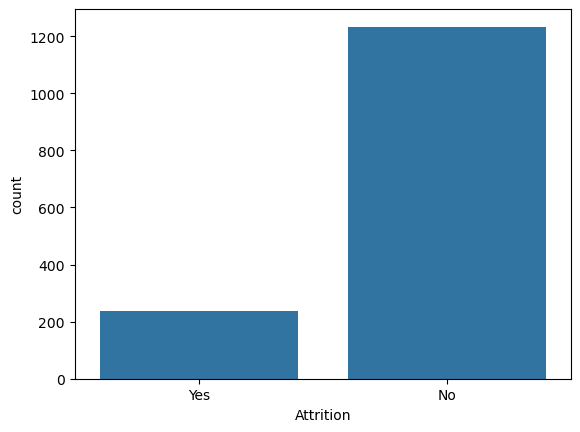

In [221]:
sns.countplot(x='Attrition',data=df)

target data is imbalanced.

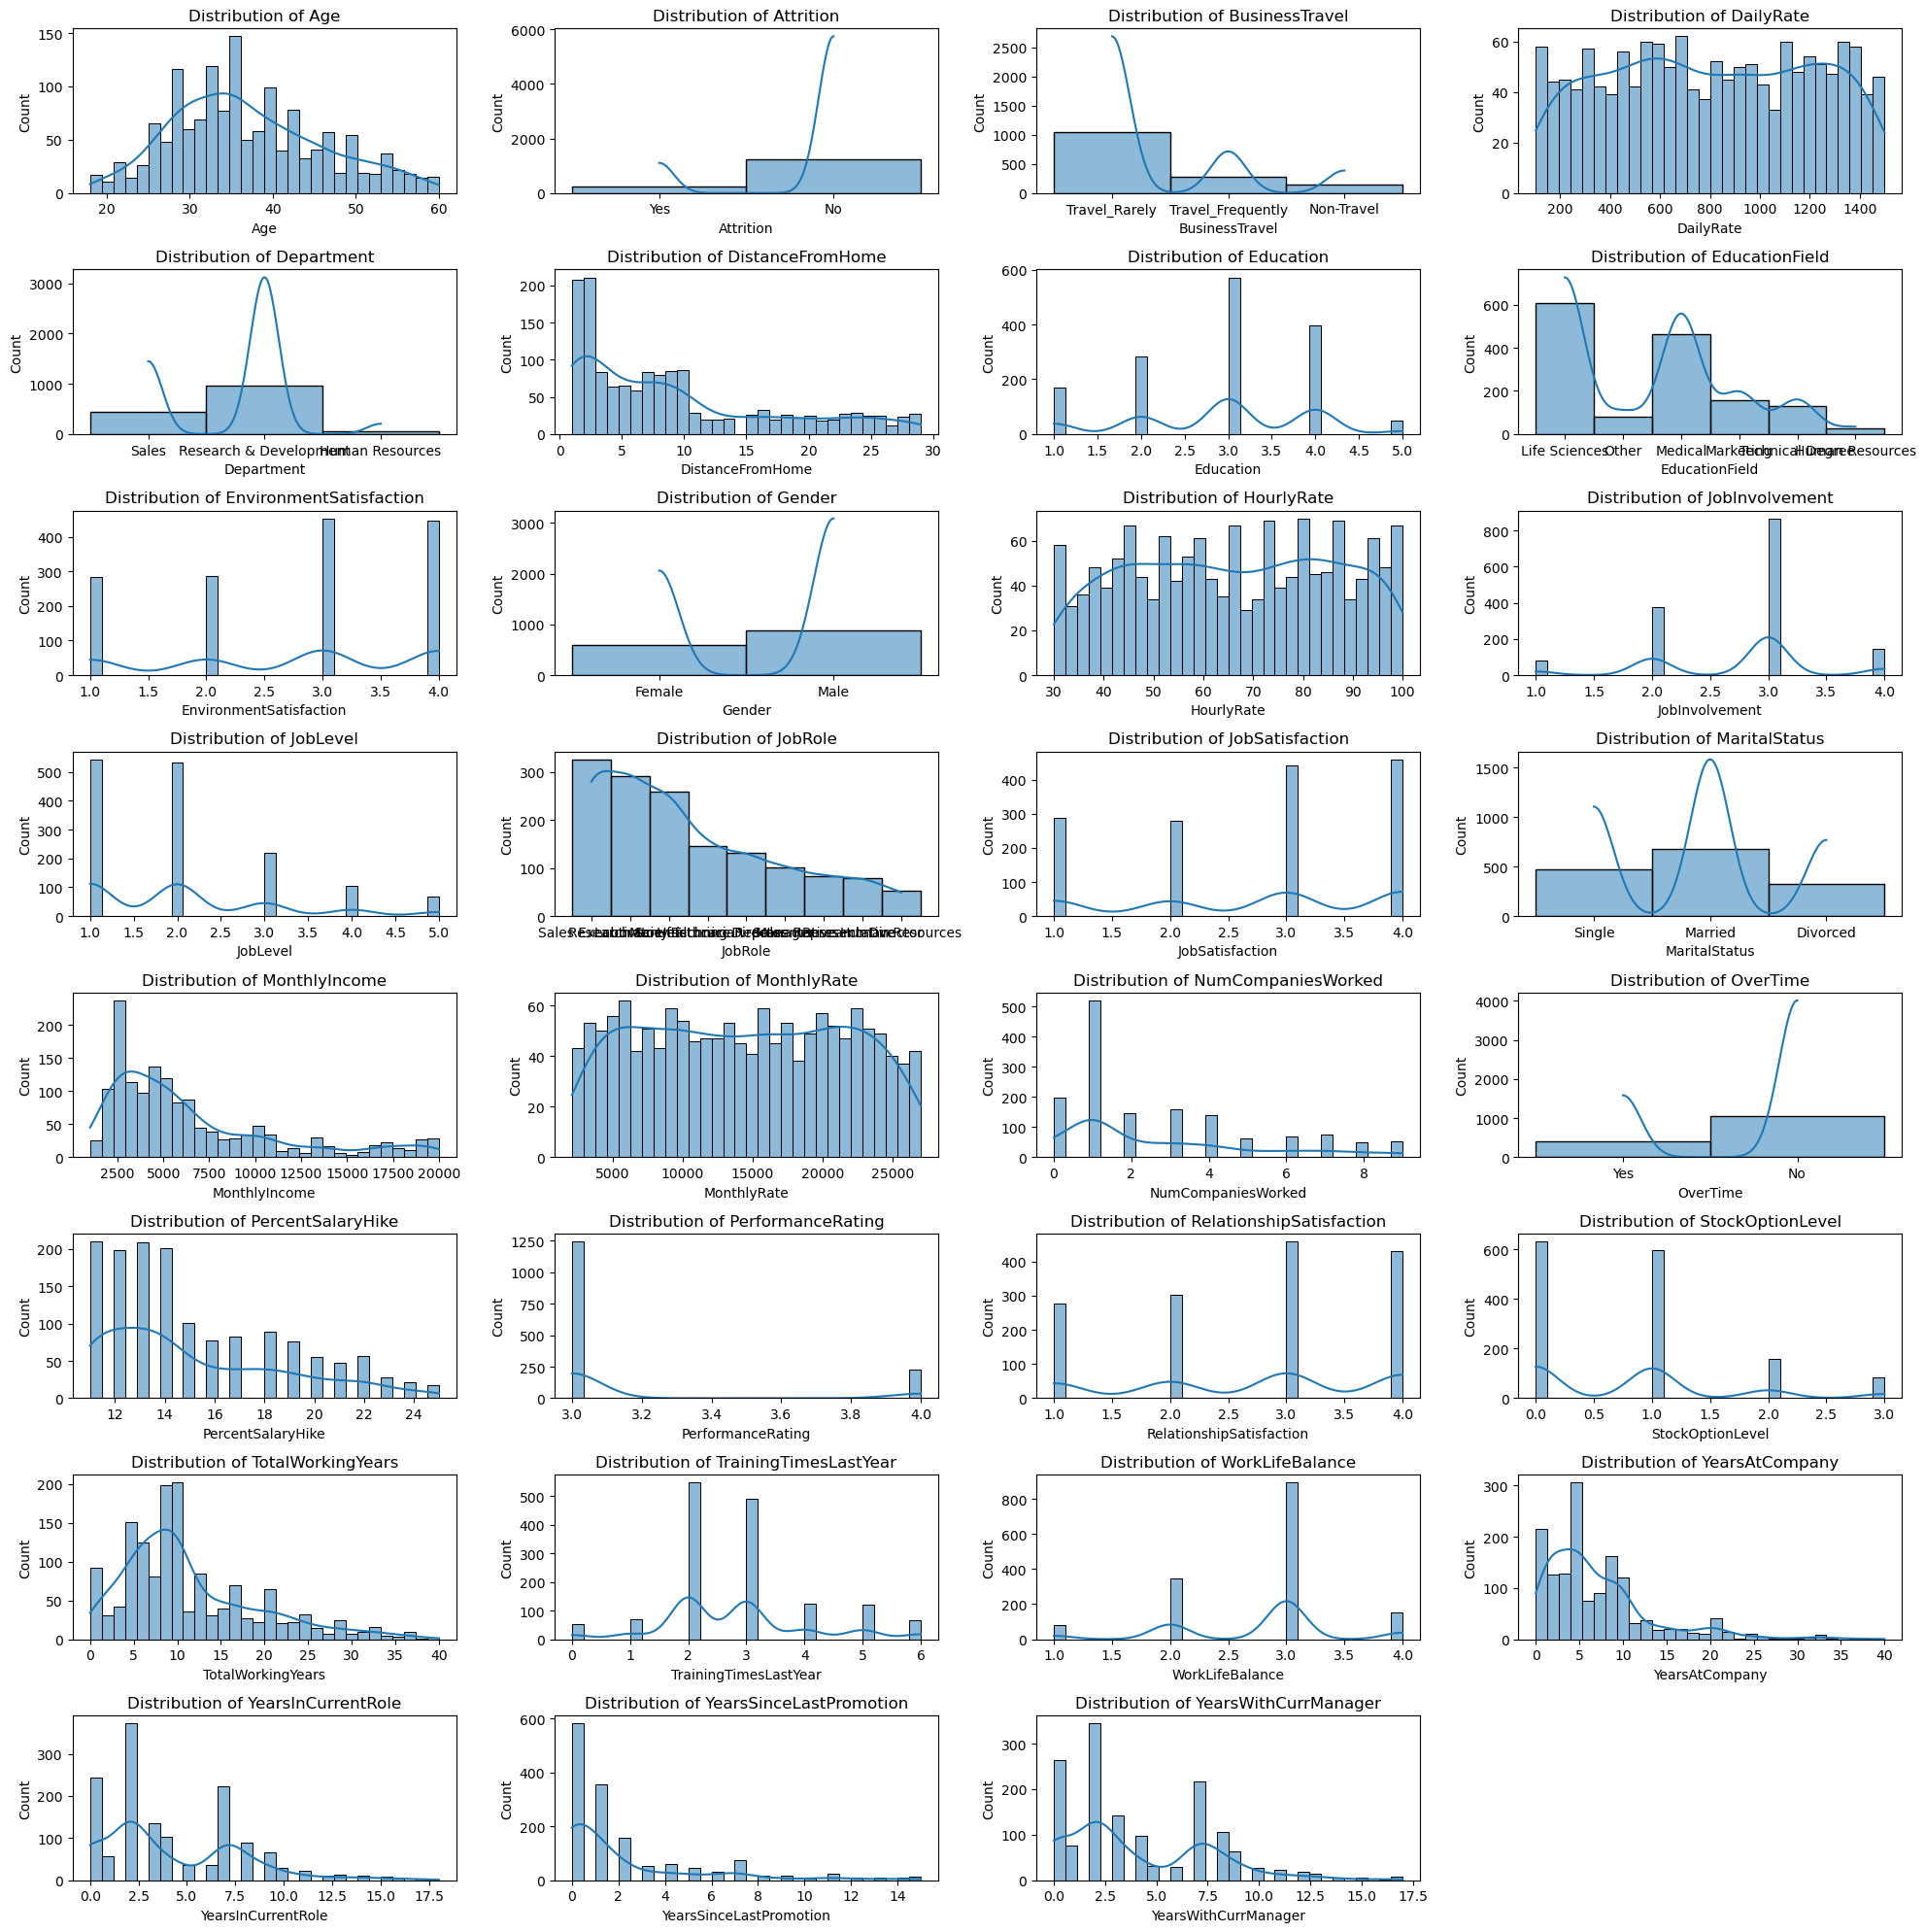

In [222]:
plt.figure(figsize=(20,20 ))
plotnumber=1
for i in df.columns:
    if plotnumber<=32:
        plt.subplot(8, 4, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

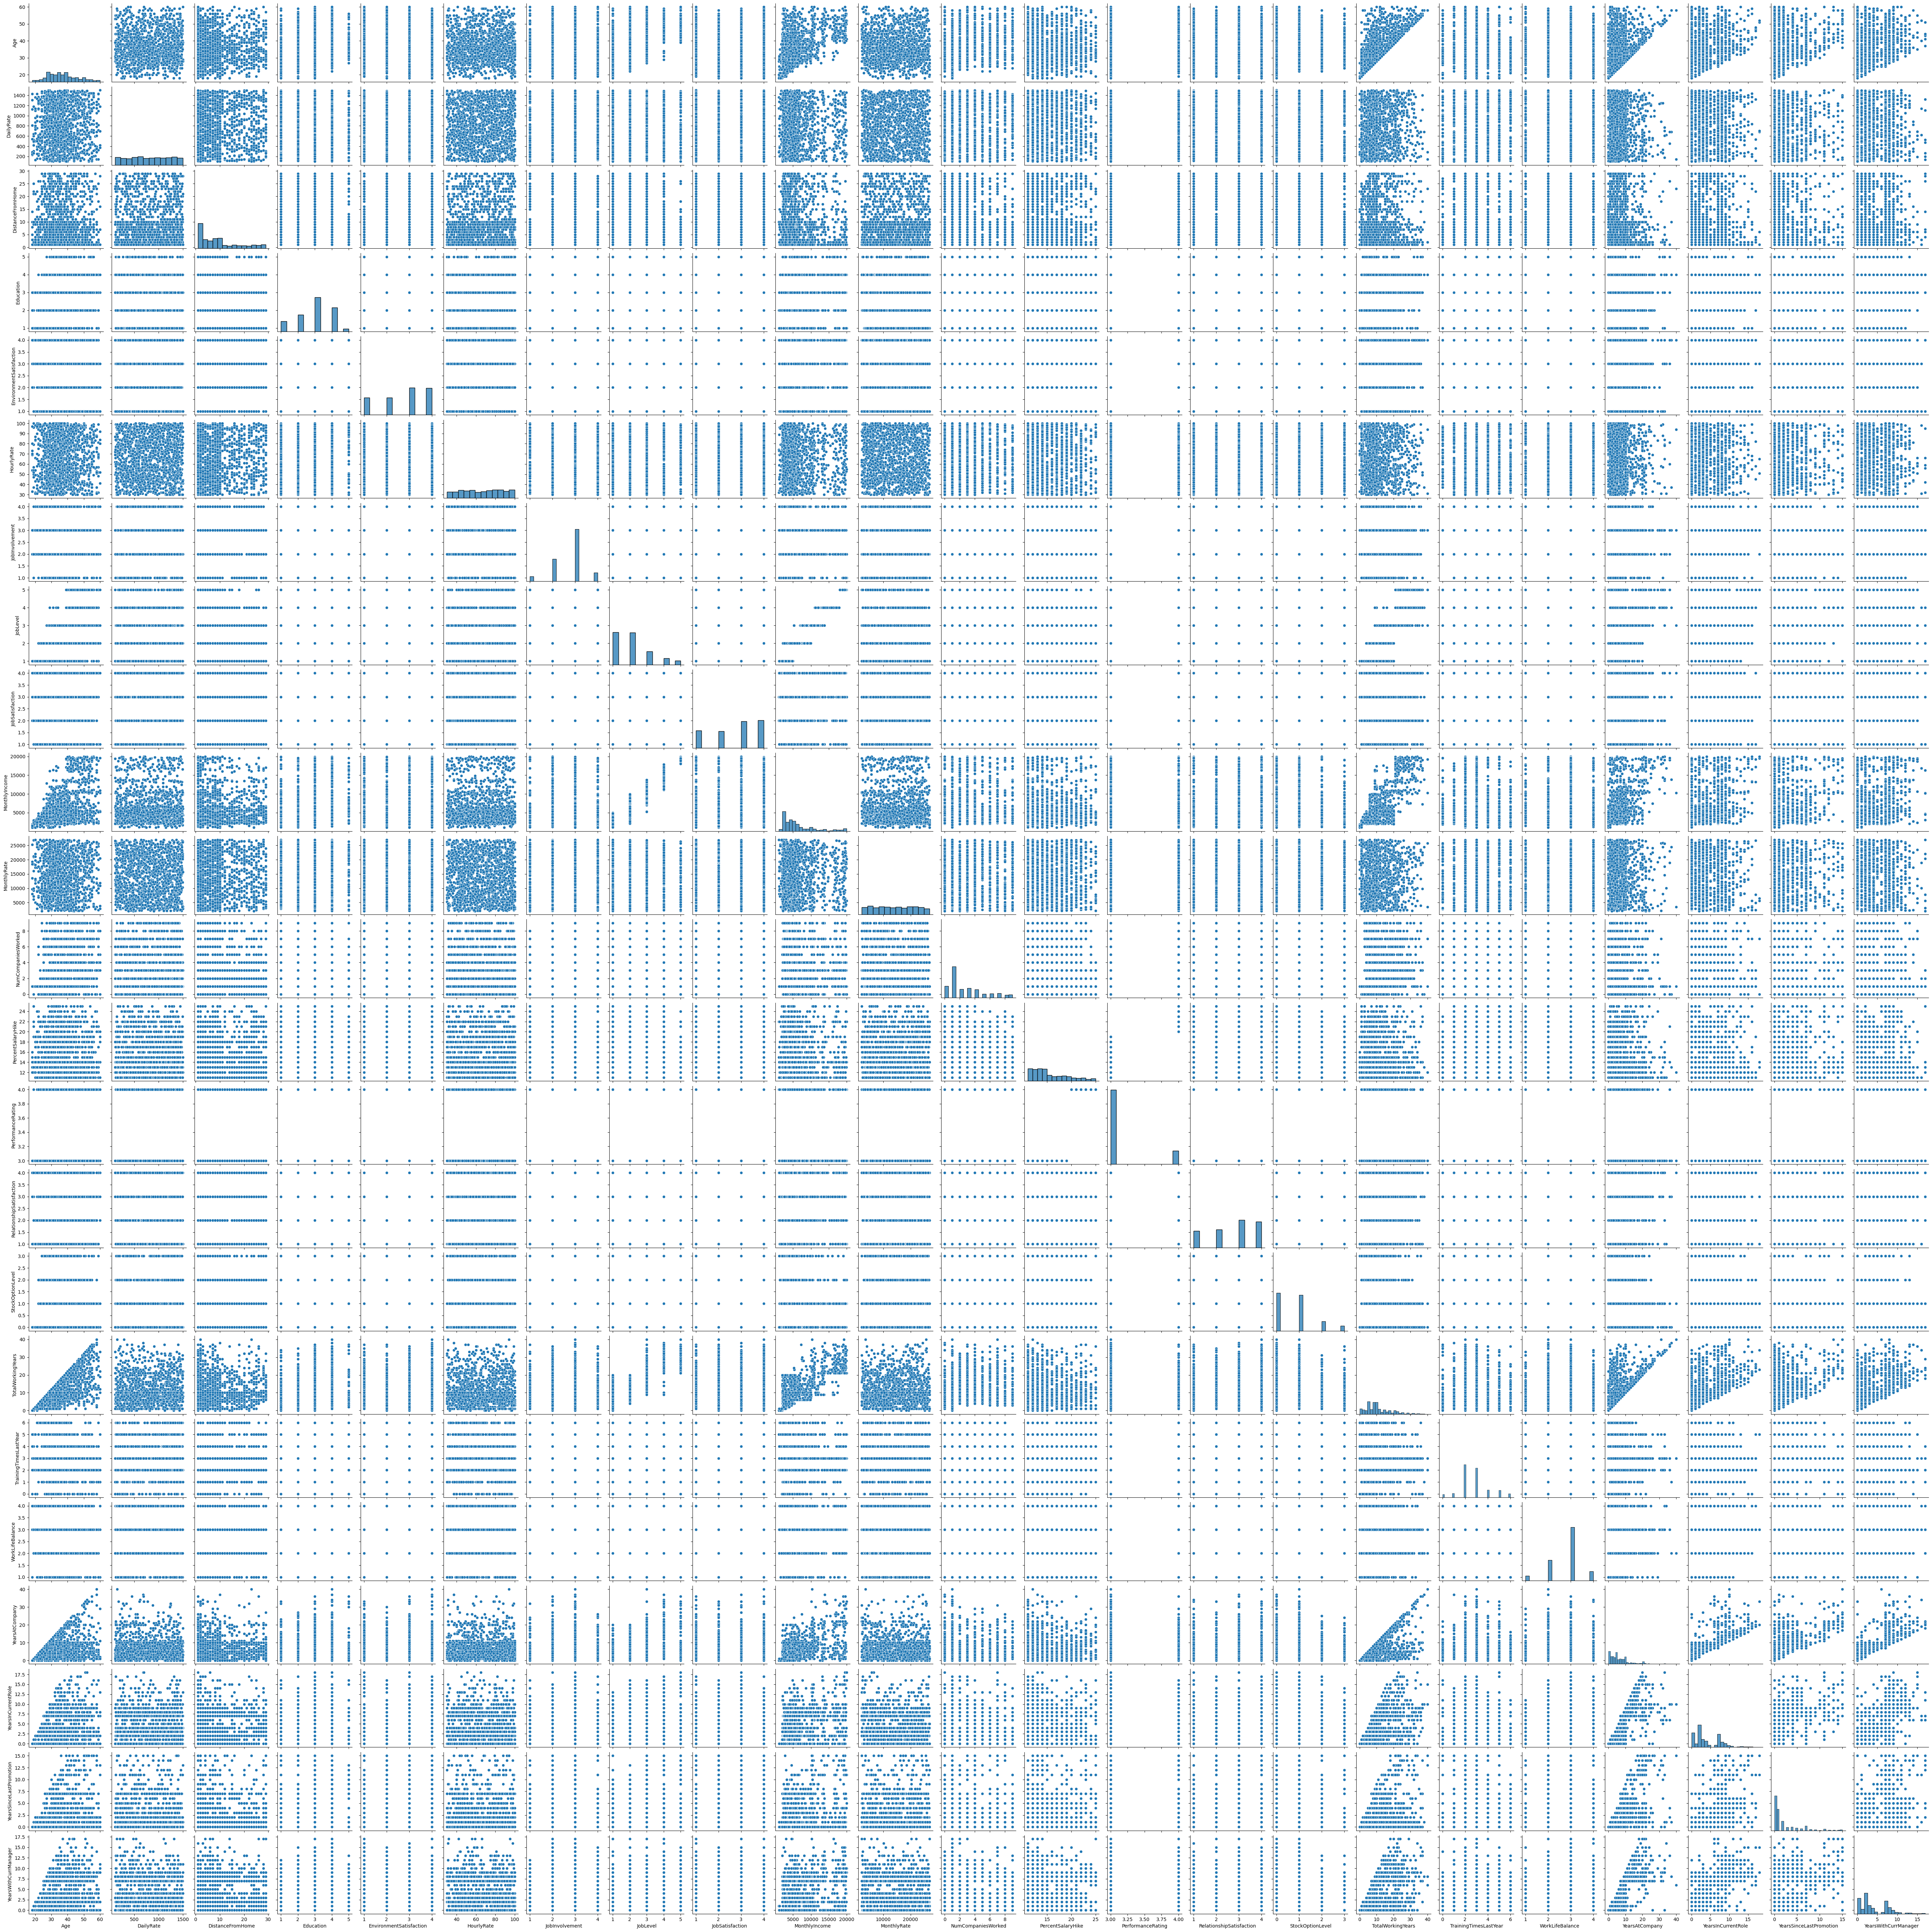

In [223]:
sns.pairplot(df)

<Axes: title={'center': 'Overtime vs Attrition'}, xlabel='OverTime', ylabel='count'>

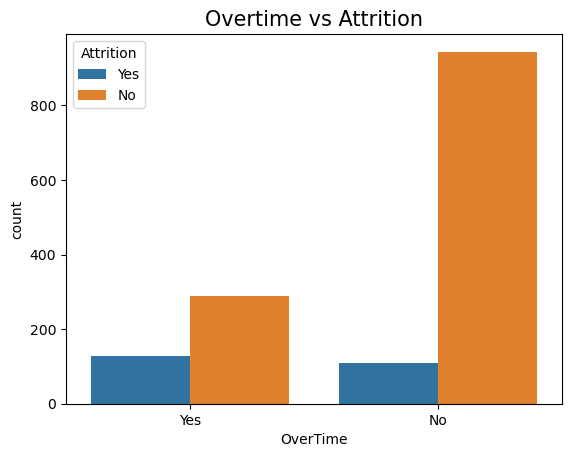

In [224]:
plt.title('Overtime vs Attrition',fontsize=15)
sns.countplot(x='OverTime',hue='Attrition',data=df)


People who do over time have higher chances to left the company as compare than the person who don't do overtime.

<Axes: title={'center': 'MaritalStatus vs Attrition'}, xlabel='MaritalStatus', ylabel='count'>

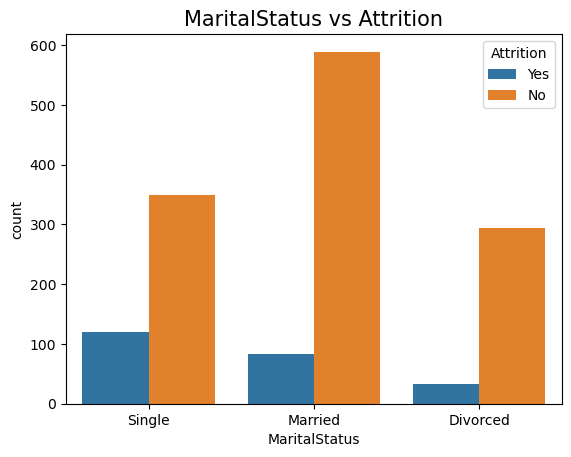

In [225]:
plt.title('MaritalStatus vs Attrition',fontsize=15)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

Divorced has lowest chanaces to left the company compared than others two. single people have higher tendency to leave the company as compared to Married.


<Axes: xlabel='Age', ylabel='count'>

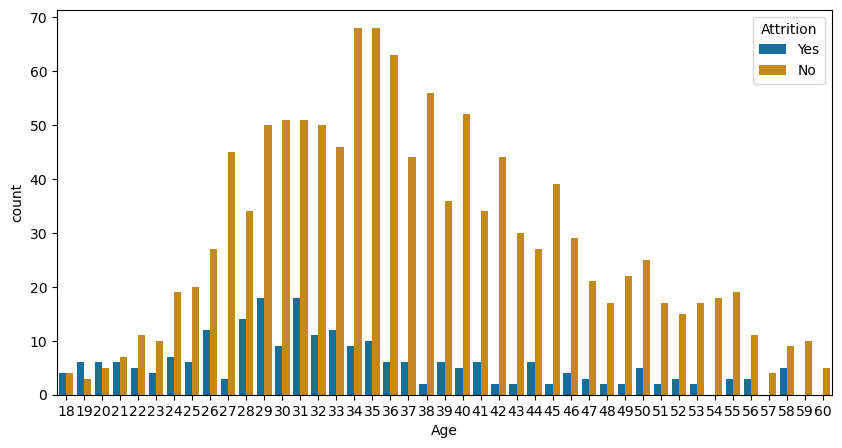

In [226]:
#Show the number of employees that left and stayed at the company by age
plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind")

Highest age retention is 34 and 35. At this age, employees do not switch the company.

<Axes: title={'center': 'Job Role vs Attrition'}, xlabel='JobRole', ylabel='count'>

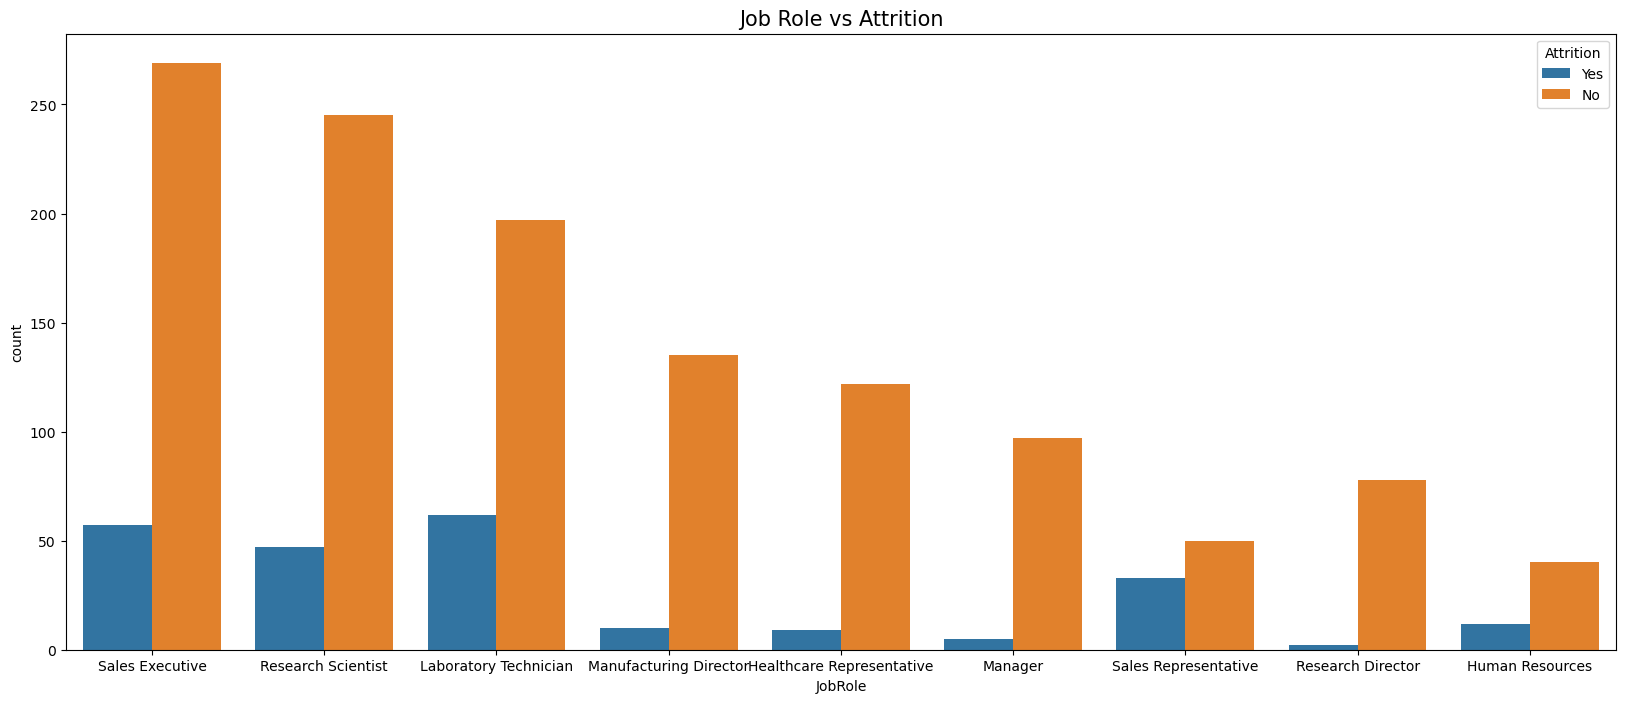

In [227]:
plt.figure(figsize=(20,8))
plt.title('Job Role vs Attrition',fontsize=15)
sns.countplot(x='JobRole',hue='Attrition',data=df)

Sales Executive, Research Scientist, Laboratory Technician have the high tendency to switch the company compared than other JobRoles.

<Axes: xlabel='Gender', ylabel='count'>

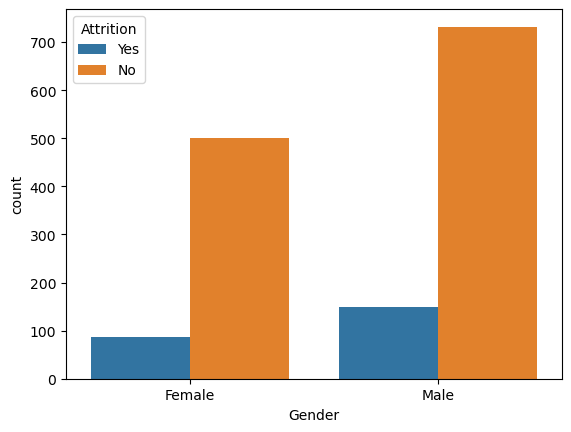

In [228]:
sns.countplot(x='Gender',hue='Attrition',data=df)

As comparison to female, mainly men has higher chances to switch the job.

<Axes: xlabel='EducationField', ylabel='count'>

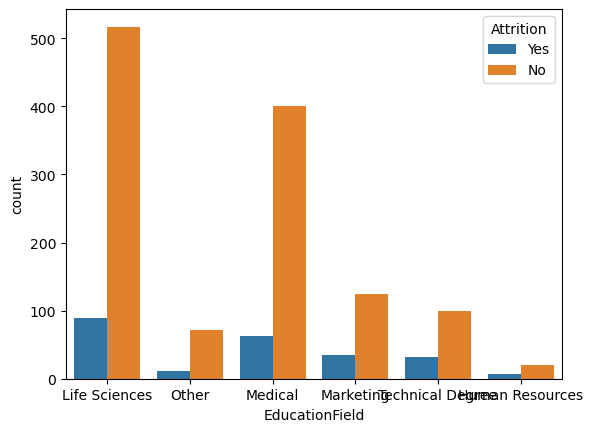

In [229]:
sns.countplot(x='EducationField',hue='Attrition',data=df)

Mainly people switch the job in LifeSciences and medical Education field.

<Axes: xlabel='Department', ylabel='count'>

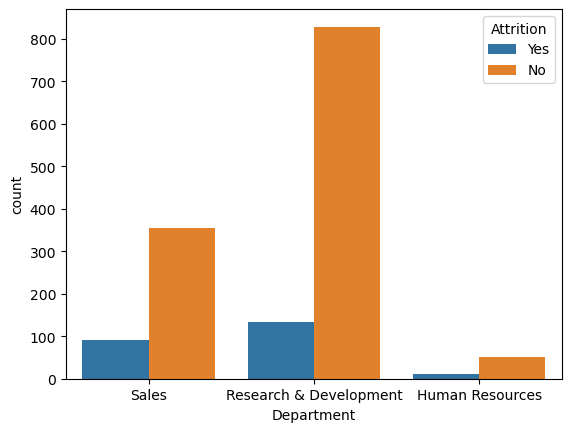

In [230]:
sns.countplot(x='Department',hue='Attrition',data=df)

Research & Development department people has higher chances to switch the companies.

<Axes: xlabel='BusinessTravel', ylabel='count'>

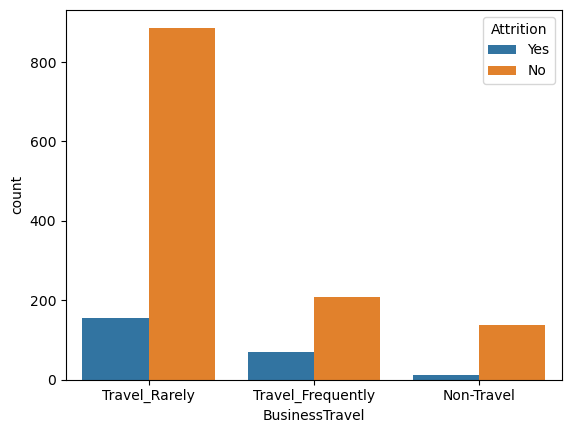

In [231]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

people who travels rarely have high tendency to switch the company or job.

<Axes: xlabel='JobSatisfaction', ylabel='count'>

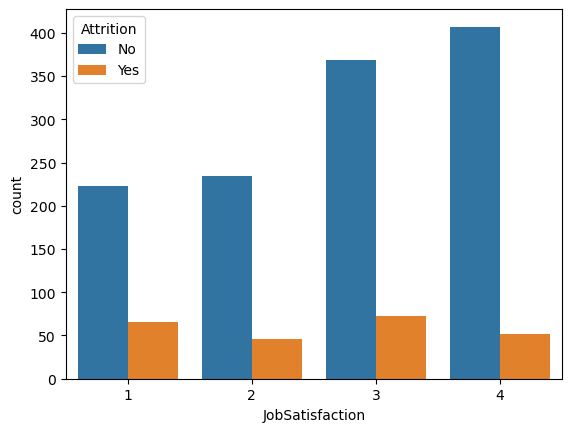

In [232]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)

<Axes: xlabel='YearsAtCompany', ylabel='count'>

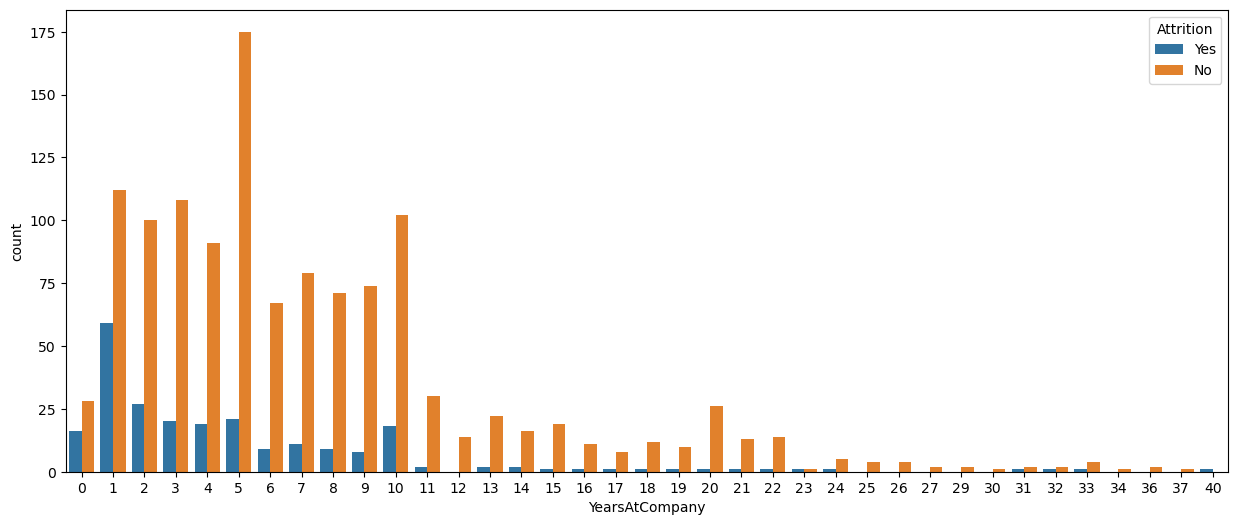

In [233]:
plt.figure(figsize=(15,6))
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df)

people who have one year experience in the particular company have mostly high chances to left the company.

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

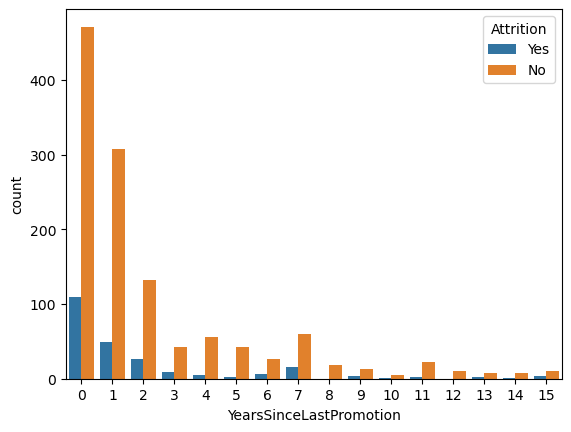

In [234]:

sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df)

people who did not promoted from last 2 years have high chances to leave the company.

<Axes: xlabel='YearsInCurrentRole', ylabel='count'>

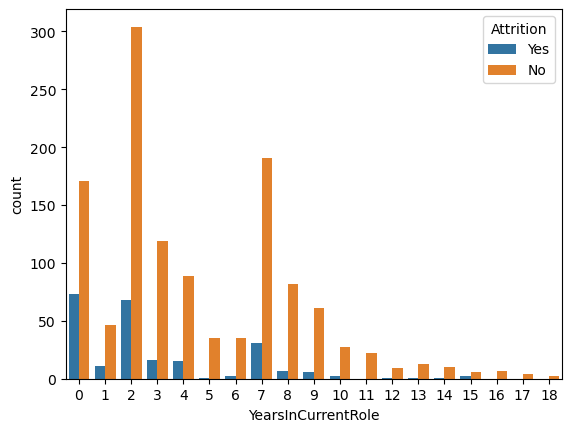

In [235]:

sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df)

people who have on same profile from last 2 years have high chances to leave the company.

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

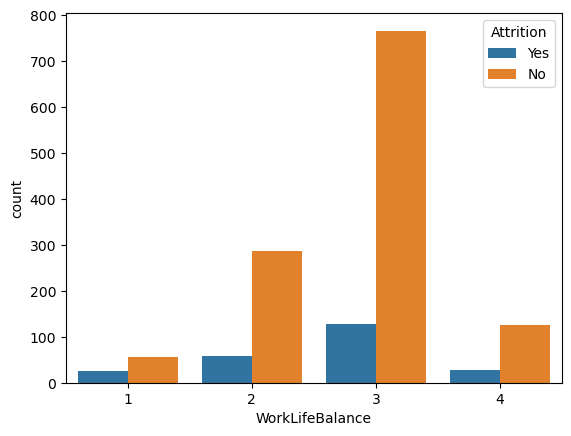

In [236]:
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df)

<Axes: xlabel='PercentSalaryHike', ylabel='count'>

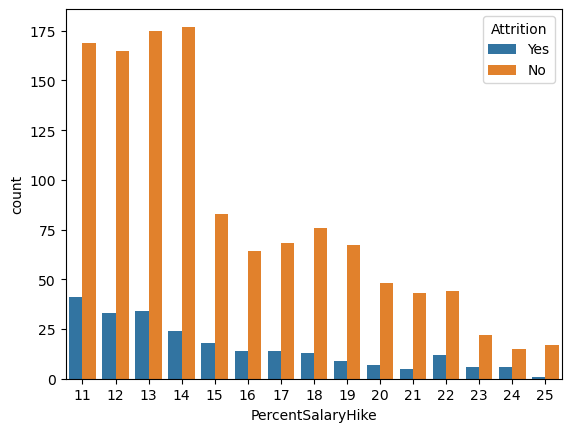

In [237]:
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df)

people who got the less percent hike (below 15%) have high chances to switch the company.

<Axes: xlabel='JobLevel', ylabel='count'>

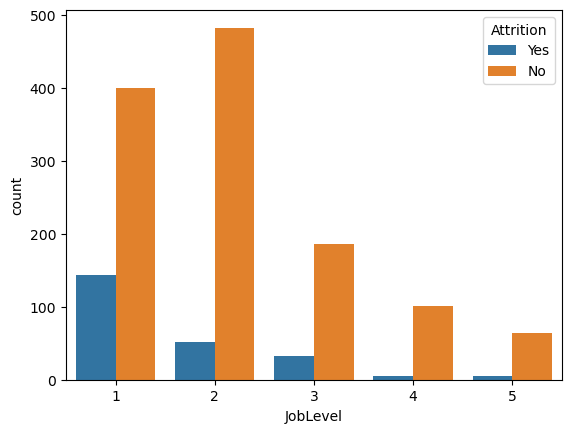

In [238]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

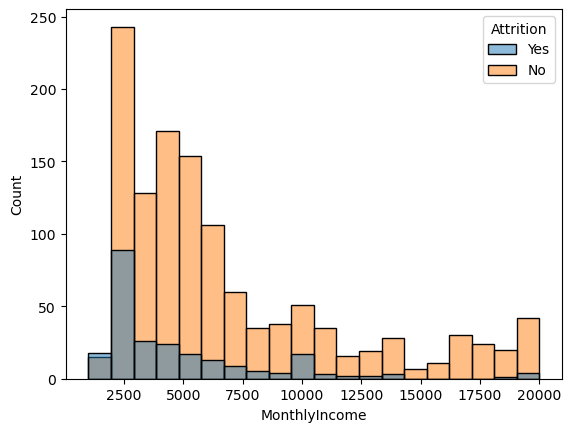

In [239]:
sns.histplot(x='MonthlyIncome',hue='Attrition',data=df)

people who have less than 10000 monthly income have higher chances to switch the company for better salary or hike in salary.

<Axes: xlabel='PerformanceRating', ylabel='count'>

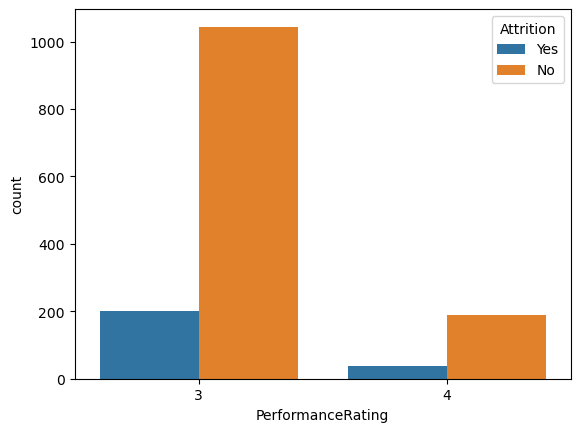

In [240]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)

people who have less performance rating have high chances to lest the job.

In [241]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [242]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [243]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [244]:
df.describe() #for statistical summary

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           14.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender  ...  PerformanceRating  RelationshipSatisfaction  \
count  1470.000000  ...        1470.000000               1470.000000   
mean      0.600000  ...           3.153741                  2.712245   
std       0.490065  ...           0.360824                  1.081209   
min       0.000000  ...           3.000000                  1.000000   
25%       0.000000  ...           3.000000                  2.000000   
50%       1.000000  ...           3.000000                  3.000000   
75%       1.000000  ...           3.000000                  4.000000   
max       1.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 31 columns]

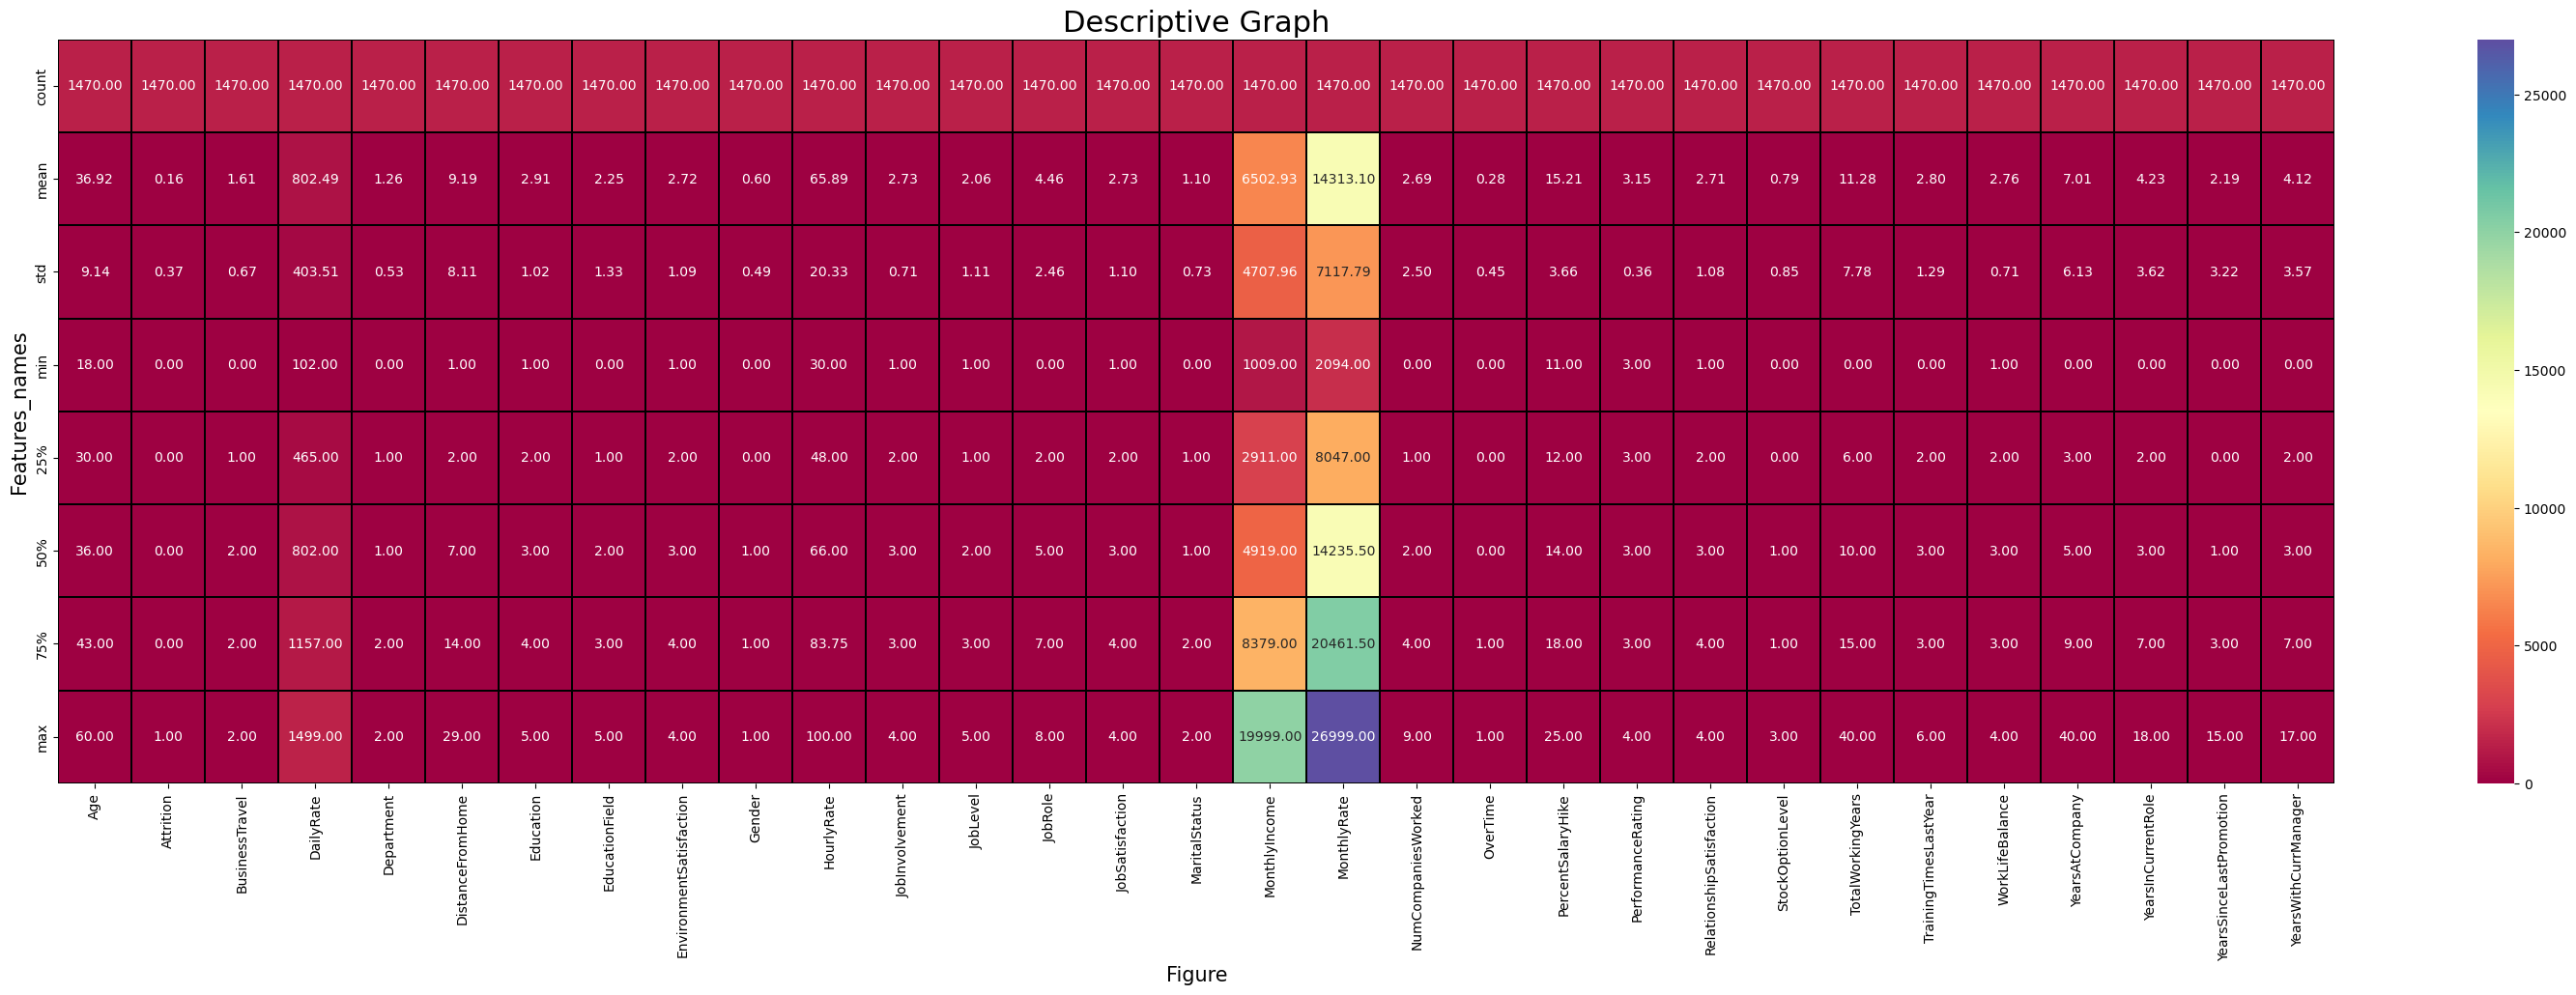

In [245]:
plt.figure(figsize=(38,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

In [246]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

<Axes: >

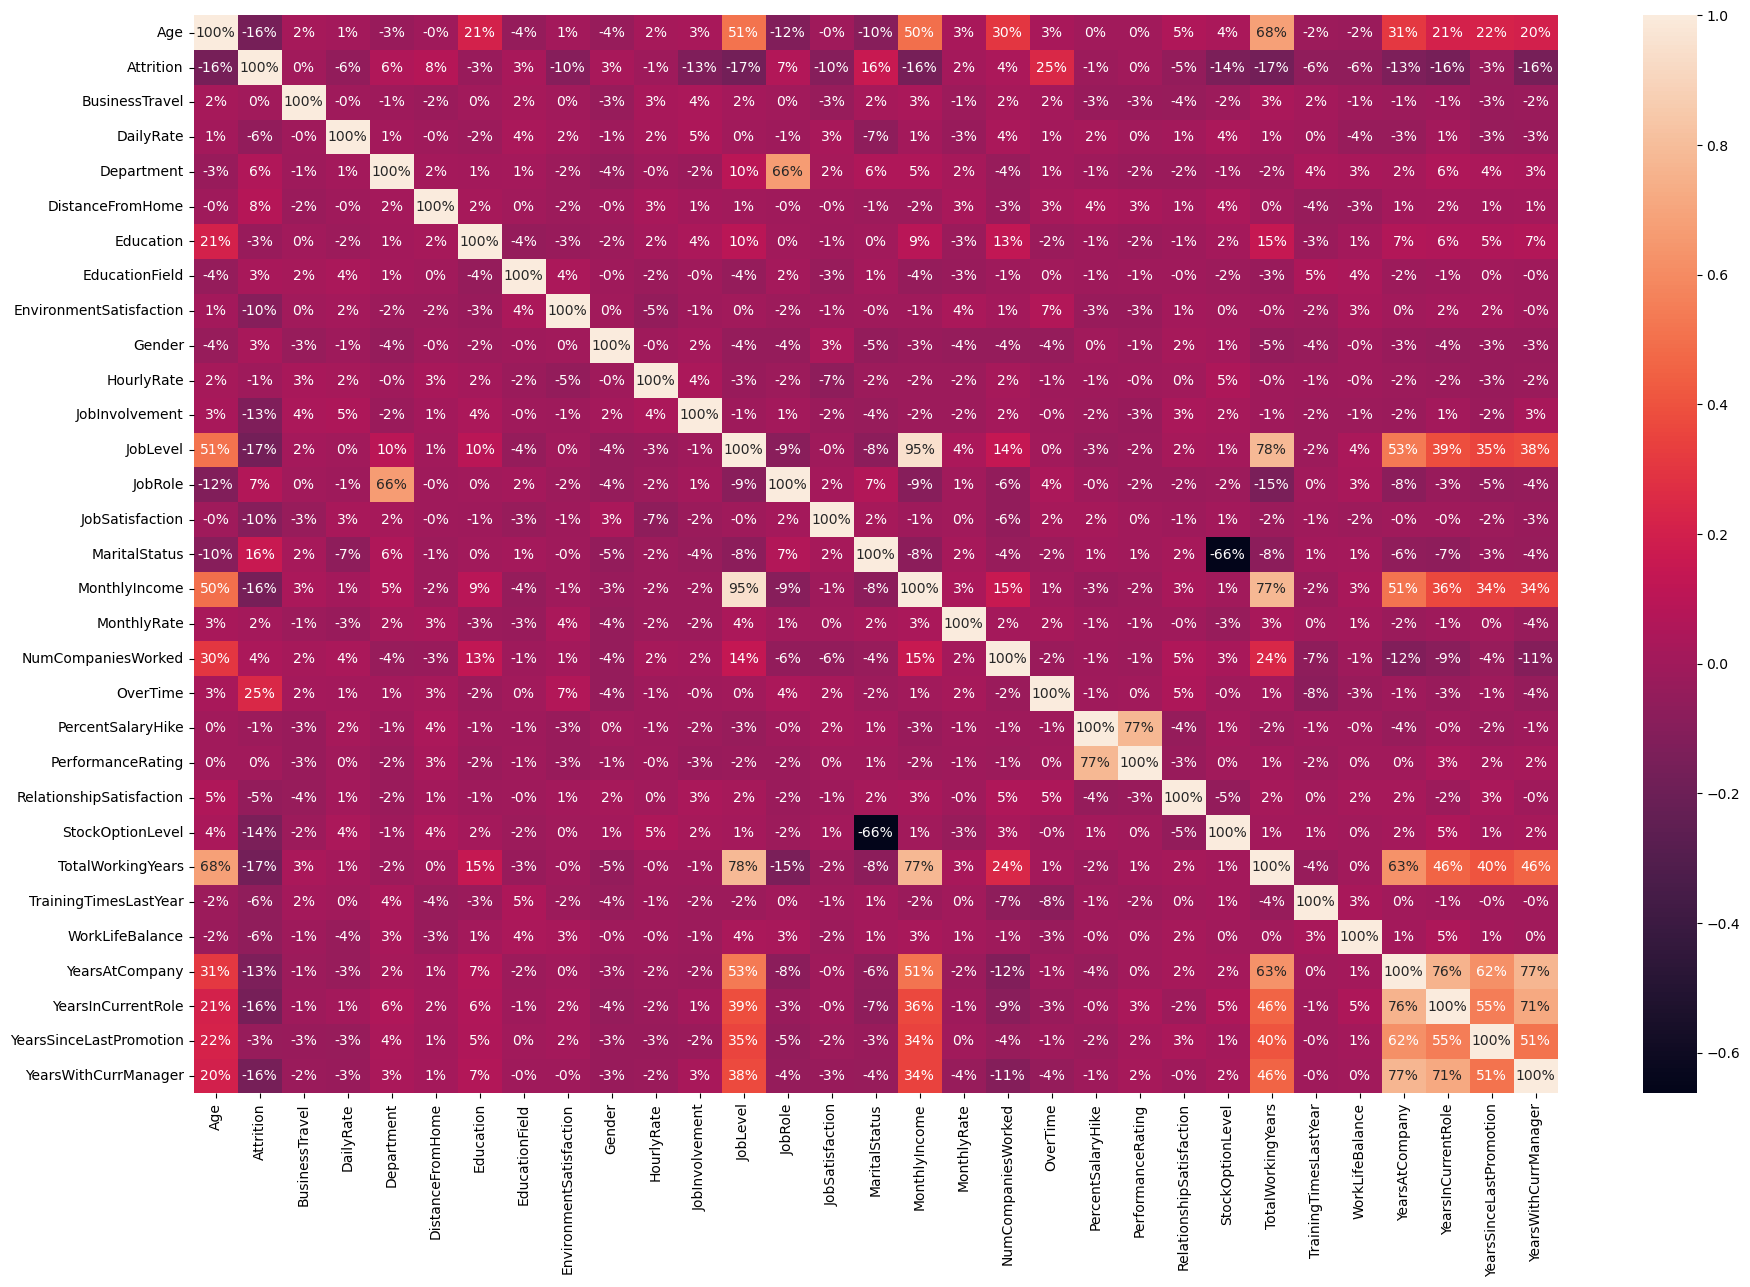

In [247]:
#Visualizing the correlation
plt.figure(figsize=(22,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

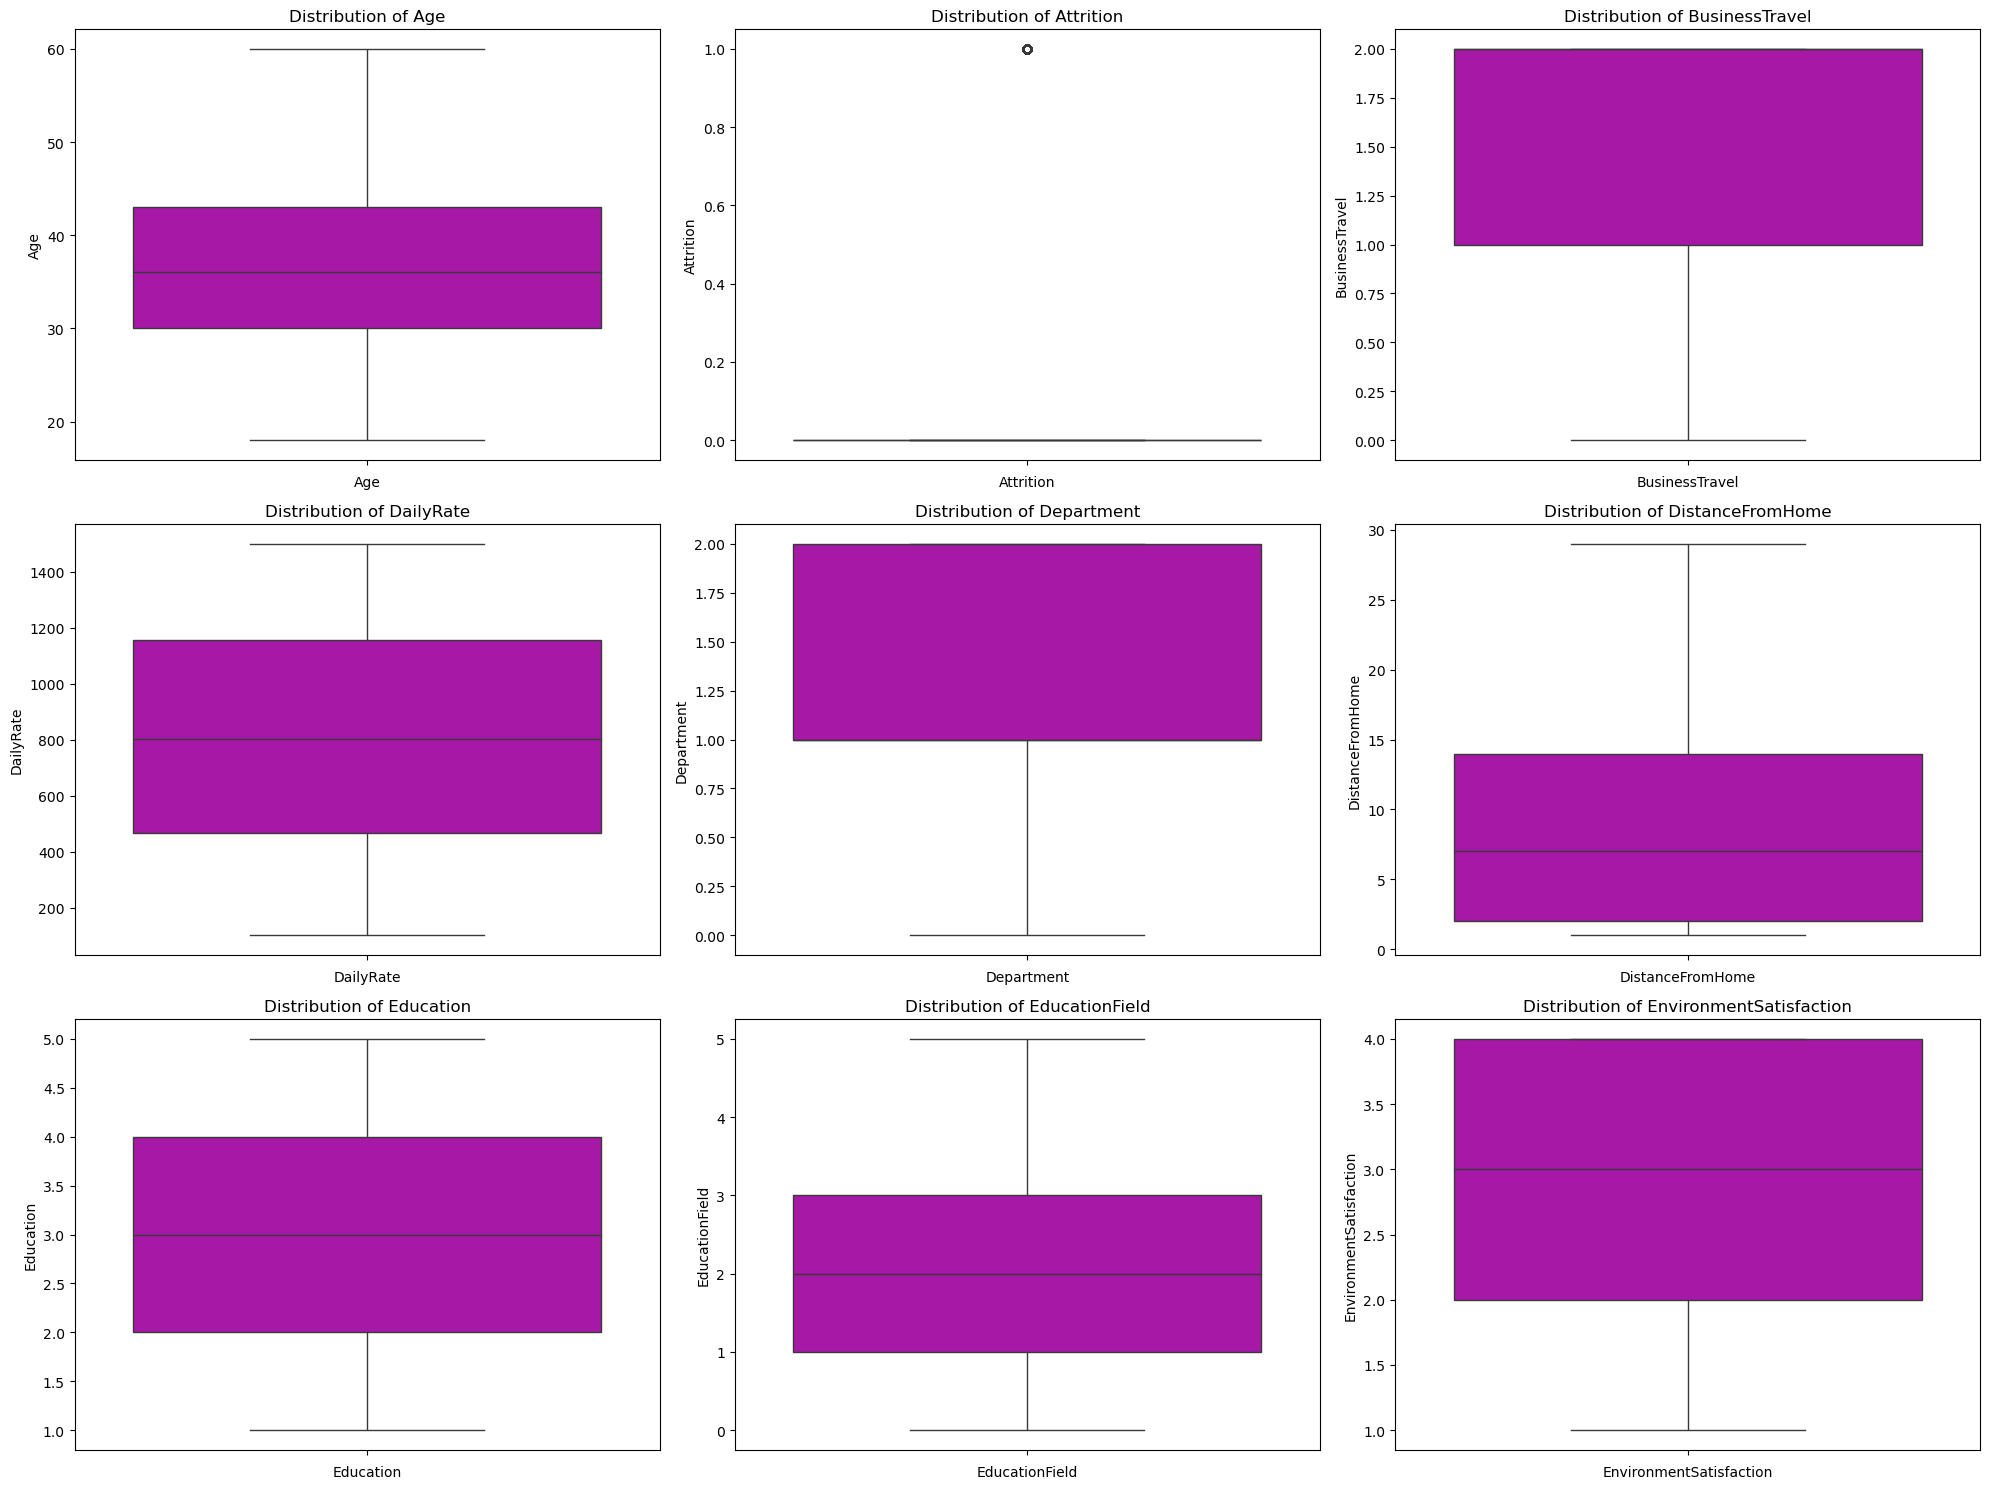

In [248]:
# checking the outliers

plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[0:9]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

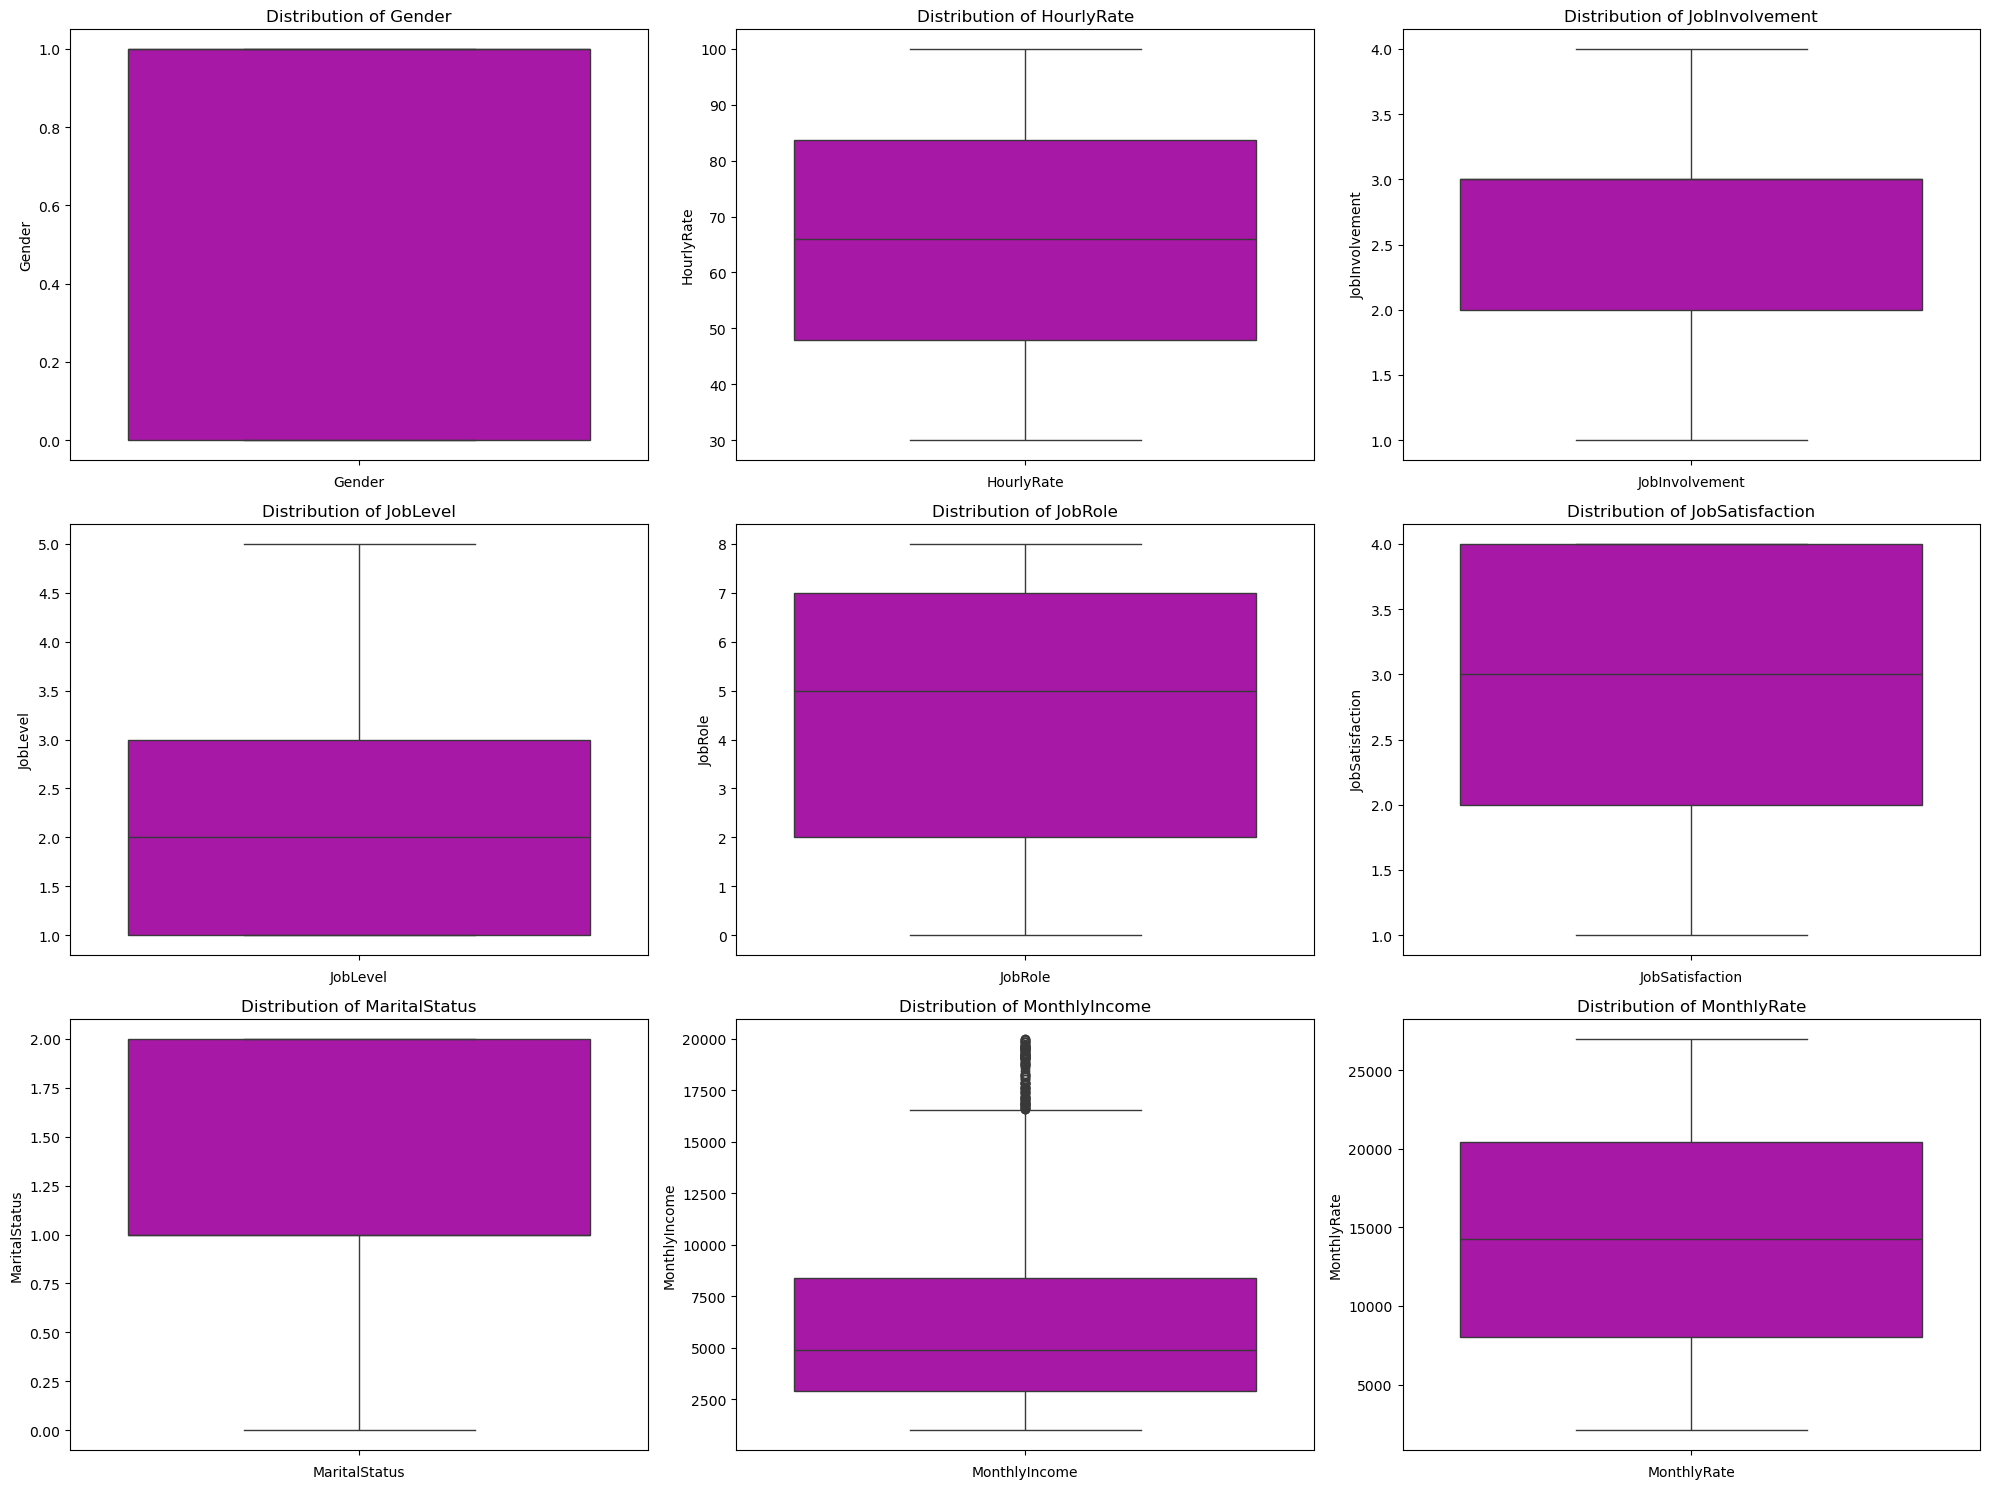

In [249]:
plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[9:18]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

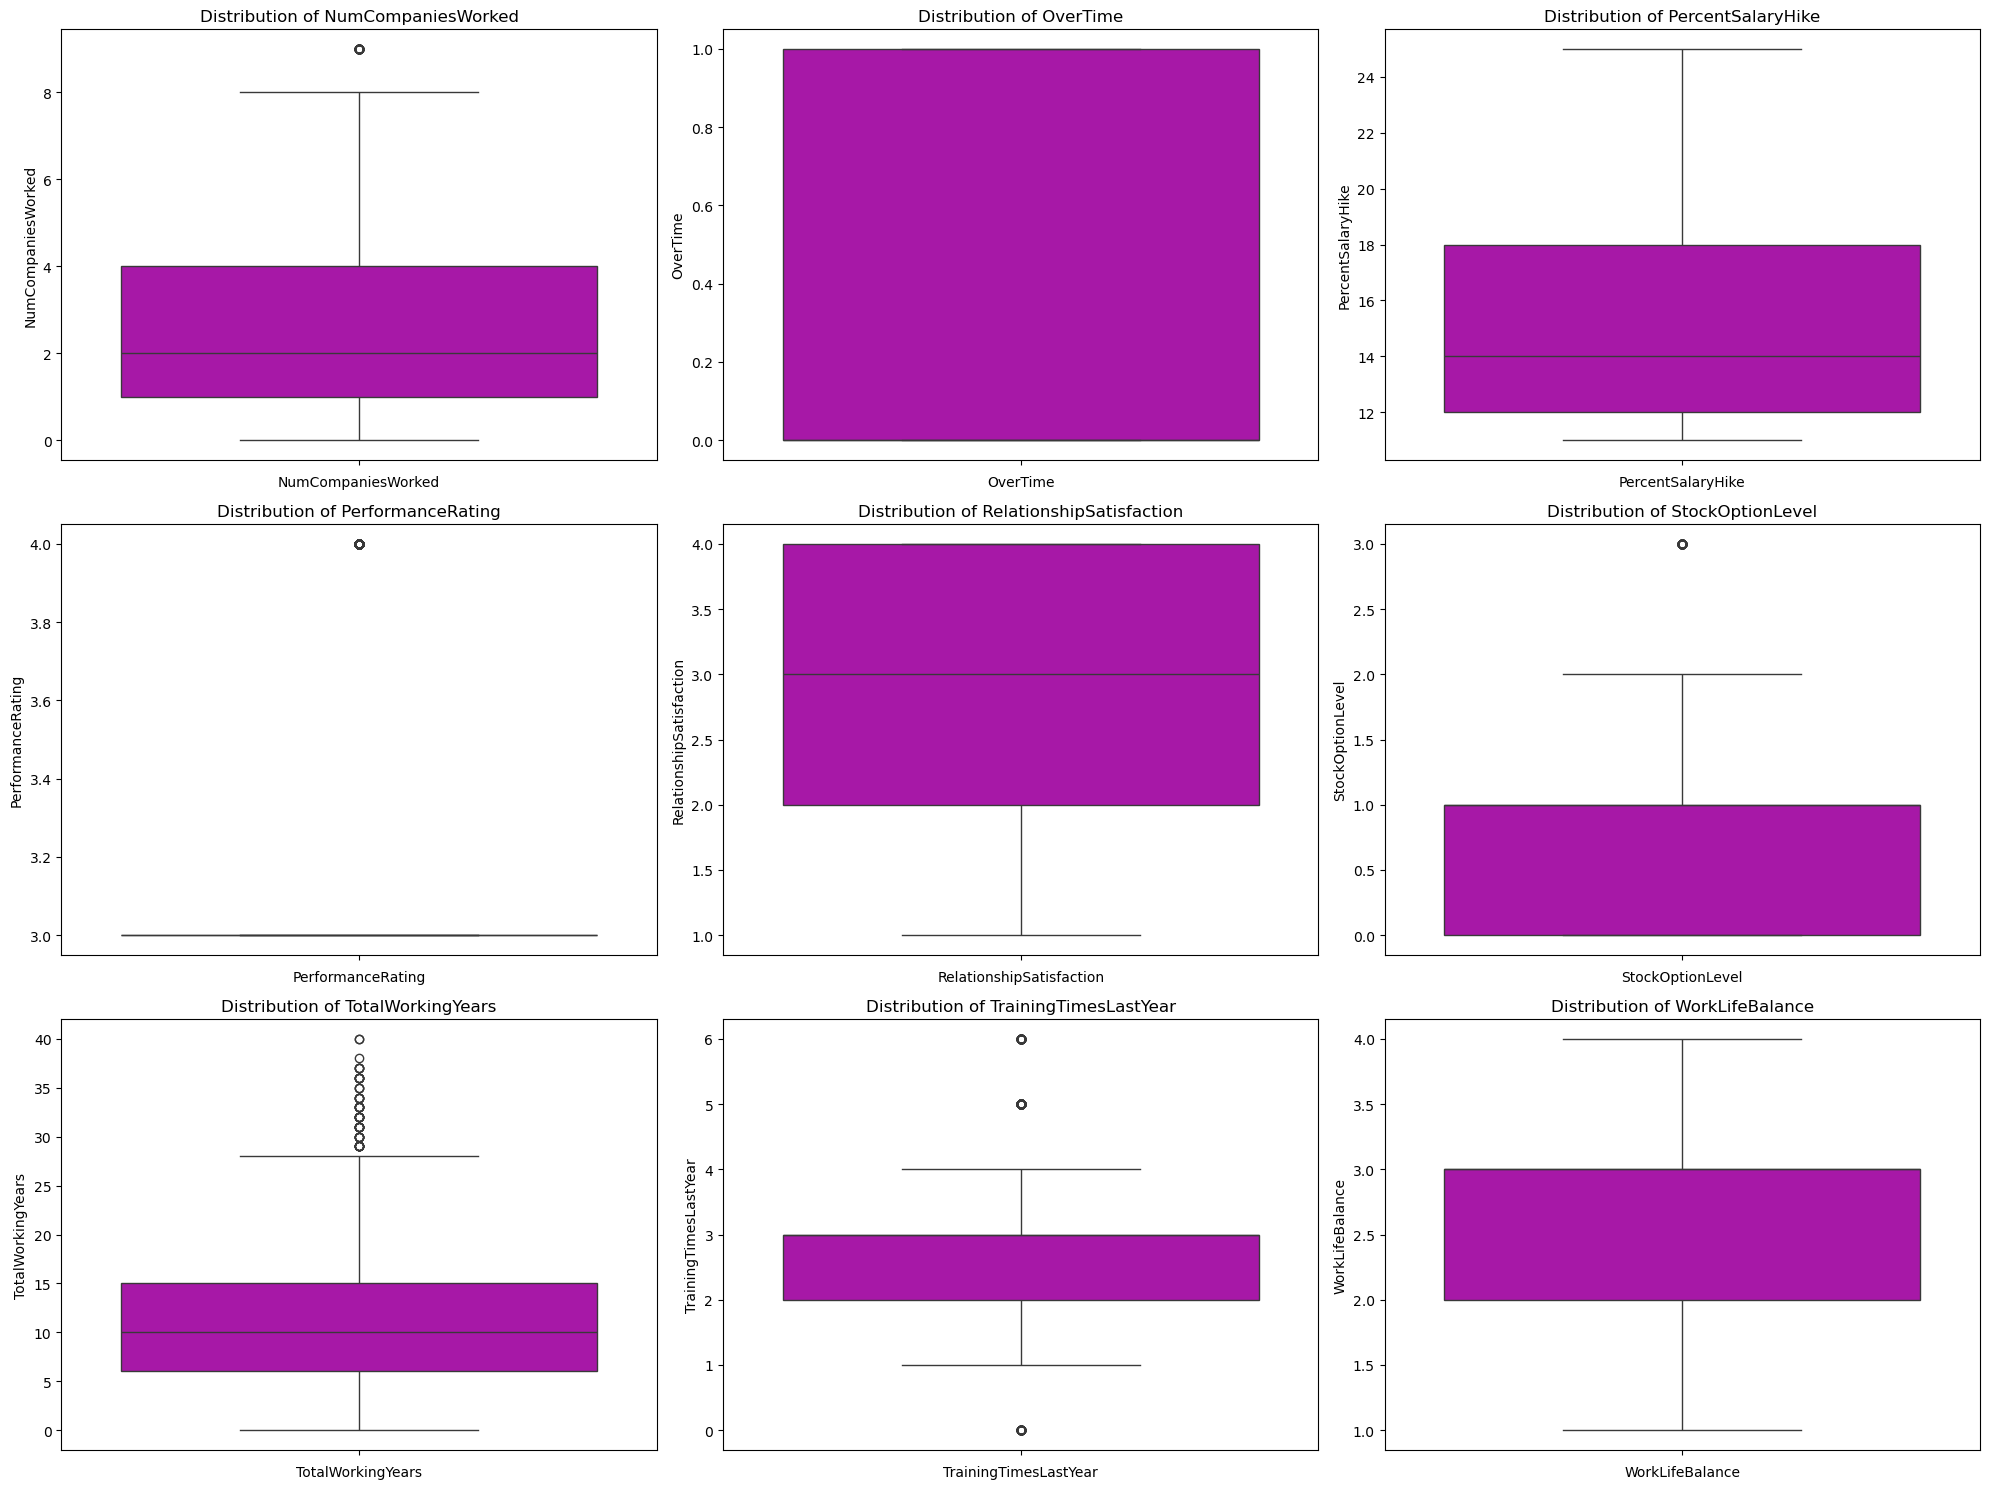

In [250]:
plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[18:27]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

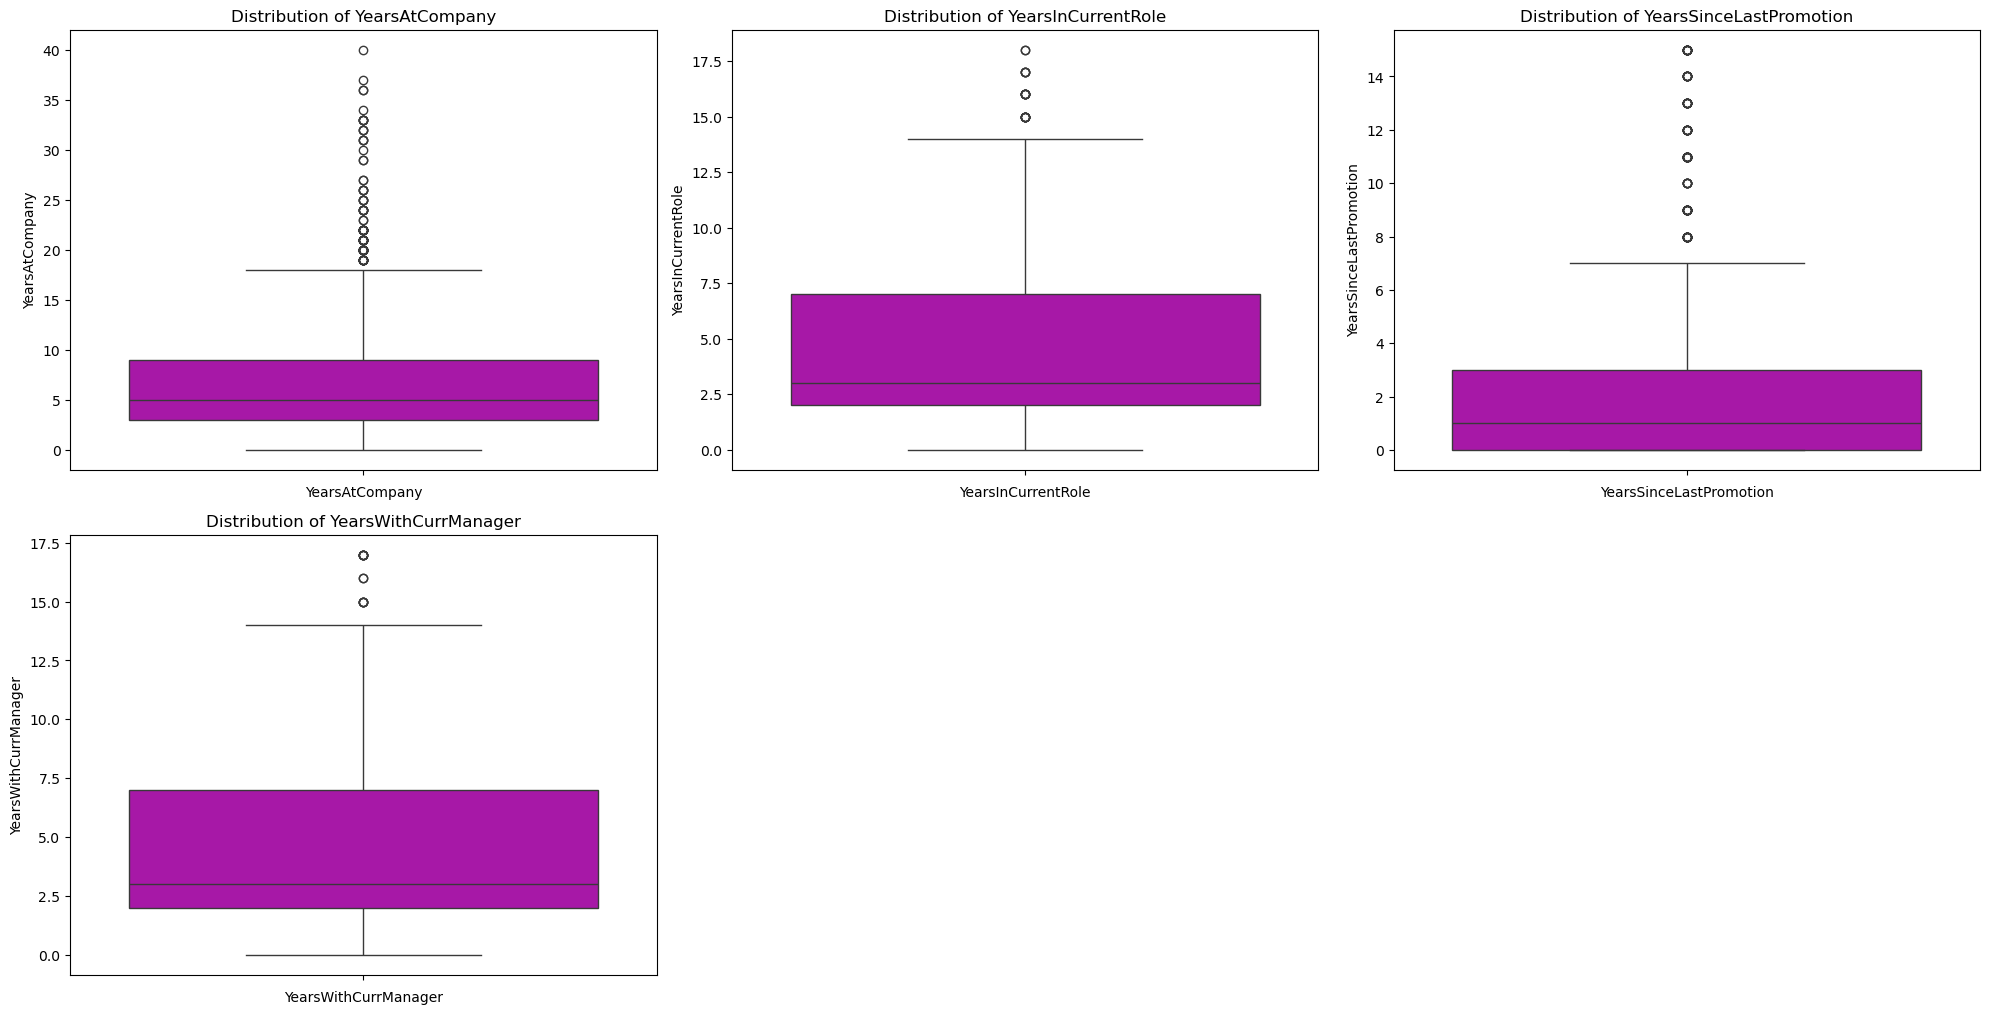

In [251]:
plt.figure(figsize=(20, 15),facecolor="white")
plotnumber=1
for i in df.columns[27:33]:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[i], color="m")
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Black dots are present in many columns, it means most of the data are present outside the distribution. So we have to remove the outliers by using the zscore.

In [252]:
#Removing the Outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

In [253]:
df_new=df[(z<3).all(axis=1)]
df_new

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [254]:
print('shape before removing the outliers:',df.shape)
print('shape after removing the outliers:',df_new.shape)

shape before removing the outliers: (1470, 31)
shape after removing the outliers: (1387, 31)


In [255]:
#%data loss calculation
loss_percent=((1470-1387)/1470)*100
print(loss_percent)

5.646258503401361


5.6% data loss is acceptable.

In [256]:
df1=df_new

In [257]:
# removing the skewness
df1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [258]:
#Removing skewness
skew=('DistanceFromHome','PercentSalaryHike','TotalWorkingYears','PerformanceRating','YearsSinceLastPromotion','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager')
for i in skew:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log1p(df1[i])

In [259]:
df1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.728348
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [260]:
#Splitting the independent and target variable
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [261]:
#checking the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
x.shape[1]

30

In [263]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [264]:
vif_cal()

    VIF Values                  Features
0    31.968070                       Age
1     6.762578            BusinessTravel
2     5.090815                 DailyRate
3    13.744950                Department
4     6.422825          DistanceFromHome
5     9.457497                 Education
6     3.908775            EducationField
7     7.285668   EnvironmentSatisfaction
8     2.554696                    Gender
9    11.526379                HourlyRate
10   15.709196            JobInvolvement
11   47.270285                  JobLevel
12    8.516020                   JobRole
13    7.270868           JobSatisfaction
14    5.967577             MaritalStatus
15   27.678134             MonthlyIncome
16    5.152821               MonthlyRate
17    2.875795        NumCompaniesWorked
18    1.440889                  OverTime
19  358.719791         PercentSalaryHike
20  442.803054         PerformanceRating
21    7.300440  RelationshipSatisfaction
22    3.357948          StockOptionLevel
23   45.070701  

In [265]:
df1.drop(['YearsWithCurrManager'],axis=1,inplace=True)

In [268]:
x=df1.drop('Attrition',axis=1)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41             2.0       1102         2.0          0.693147          2   
1      49             1.0        279         1.0          2.197225          1   
2      37             2.0       1373         1.0          1.098612          2   
3      33             1.0       1392         1.0          1.386294          4   
4      27             2.0        591         1.0          1.098612          1   
...   ...             ...        ...         ...               ...        ...   
1465   36             1.0        884         1.0          3.178054          2   
1466   39             2.0        613         1.0          1.945910          1   
1467   27             2.0        155         1.0          1.609438          3   
1468   49             1.0       1023         2.0          1.098612          3   
1469   34             2.0        628         1.0          2.197225          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                1.0                        2     0.0          94  ...   
1                1.0                        3     1.0          61  ...   
2                4.0                        4     1.0          92  ...   
3                1.0                        4     0.0          56  ...   
4                3.0                        1     1.0          40  ...   
...              ...                      ...     ...         ...  ...   
1465             3.0                        3     1.0          41  ...   
1466             3.0                        4     1.0          42  ...   
1467             1.0                        2     1.0          87  ...   
1468             3.0                        4     1.0          63  ...   
1469             3.0                        2     1.0          82  ...   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0              2.484907           1.386294                         1   
1              3.178054           1.609438                         4   
2              2.772589           1.386294                         2   
3              2.484907           1.386294                         3   
4              2.564949           1.386294                         4   
...                 ...                ...                       ...   
1465           2.890372           1.386294                         3   
1466           2.772589           1.386294                         1   
1467           3.044522           1.609438                         2   
1468           2.708050           1.386294                         4   
1469           2.564949           1.386294                         1   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0           2.197225                      0   
1                    1           2.397895                      3   
2                    0           2.079442                      3   
3                    0           2.197225                      3   
4                    1           1.945910                      3   
...                ...                ...                    ...   
1465                 1           2.890372                      3   
1466                 1           2.302585                      5   
1467                 1           1.945910                      0   
1468                 0           2.890372                      3   
1469                 0           1.945910                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1        1.945910            1.609438   
1                   3        2.397895            2.079442   
2                   3        0.000000            0.000000   
3                   3        2.197225            2.079442   
4                   3        1.098612            1.098612   
...               ...             ...                 ...   
1465                3        1.7917

In [269]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [270]:
vif_cal()

    VIF Values                  Features
0    31.844393                       Age
1     6.757419            BusinessTravel
2     5.090519                 DailyRate
3    13.741456                Department
4     6.415263          DistanceFromHome
5     9.453833                 Education
6     3.903911            EducationField
7     7.284250   EnvironmentSatisfaction
8     2.554238                    Gender
9    11.526254                HourlyRate
10   15.657830            JobInvolvement
11   47.262694                  JobLevel
12    8.512070                   JobRole
13    7.258069           JobSatisfaction
14    5.962573             MaritalStatus
15   27.610837             MonthlyIncome
16    5.152820               MonthlyRate
17    2.875429        NumCompaniesWorked
18    1.440861                  OverTime
19  358.453020         PercentSalaryHike
20  441.865122         PerformanceRating
21    7.295979  RelationshipSatisfaction
22    3.354382          StockOptionLevel
23   44.846572  

In [271]:
df1.drop(['PercentSalaryHike'],axis=1,inplace=True)

In [272]:
x=df1.drop('Attrition',axis=1)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41             2.0       1102         2.0          0.693147          2   
1      49             1.0        279         1.0          2.197225          1   
2      37             2.0       1373         1.0          1.098612          2   
3      33             1.0       1392         1.0          1.386294          4   
4      27             2.0        591         1.0          1.098612          1   
...   ...             ...        ...         ...               ...        ...   
1465   36             1.0        884         1.0          3.178054          2   
1466   39             2.0        613         1.0          1.945910          1   
1467   27             2.0        155         1.0          1.609438          3   
1468   49             1.0       1023         2.0          1.098612          3   
1469   34             2.0        628         1.0          2.197225          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                1.0                        2     0.0          94  ...   
1                1.0                        3     1.0          61  ...   
2                4.0                        4     1.0          92  ...   
3                1.0                        4     0.0          56  ...   
4                3.0                        1     1.0          40  ...   
...              ...                      ...     ...         ...  ...   
1465             3.0                        3     1.0          41  ...   
1466             3.0                        4     1.0          42  ...   
1467             1.0                        2     1.0          87  ...   
1468             3.0                        4     1.0          63  ...   
1469             3.0                        2     1.0          82  ...   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0          1.0           1.386294                         1                 0   
1          0.0           1.609438                         4                 1   
2          1.0           1.386294                         2                 0   
3          1.0           1.386294                         3                 0   
4          0.0           1.386294                         4                 1   
...        ...                ...                       ...               ...   
1465       0.0           1.386294                         3                 1   
1466       0.0           1.386294                         1                 1   
1467       1.0           1.609438                         2                 1   
1468       0.0           1.386294                         4                 0   
1469       0.0           1.386294                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0              2.197225                      0                1   
1              2.397895                      3                3   
2              2.079442                      3                3   
3              2.197225                      3                3   
4              1.945910                      3                3   
...                 ...                    ...              ...   
1465           2.890372                      3                3   
1466           2.302585                      5                3   
1467           1.945910                      0                3   
1468           2.890372                      3                2   
1469           1.945910                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  
0           1.945910            1.609438                 0.000000  
1           2.397895            2.079442                 0.693147  
2           0.000000            0.000000                 0.000000  
3           2.197225            2.079442                 1.386294  
4           1.098612      

In [273]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
    vif["Features"]=x.columns
    print(vif)

In [274]:
vif_cal()

    VIF Values                  Features
0    31.807347                       Age
1     6.755752            BusinessTravel
2     5.081493                 DailyRate
3    13.740991                Department
4     6.403638          DistanceFromHome
5     9.452641                 Education
6     3.903866            EducationField
7     7.283916   EnvironmentSatisfaction
8     2.553099                    Gender
9    11.522344                HourlyRate
10   15.657330            JobInvolvement
11   47.261912                  JobLevel
12    8.507083                   JobRole
13    7.255375           JobSatisfaction
14    5.958980             MaritalStatus
15   27.610328             MonthlyIncome
16    5.152814               MonthlyRate
17    2.875271        NumCompaniesWorked
18    1.439973                  OverTime
19   89.041994         PerformanceRating
20    7.291944  RelationshipSatisfaction
21    3.353172          StockOptionLevel
22   44.846224         TotalWorkingYears
23    5.793052  

In [275]:
y.shape

(1387,)

In [276]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.29775084,
         0.37256681, -0.96408623],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  0.93917603,
         0.98090913, -0.02809563],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -2.46374663,
        -1.7105856 , -0.96408623],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ...,  0.29775084,
        -0.28861286, -0.96408623],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.80391859,
         0.80807473, -0.96408623],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.17974666,
         0.08374422, -0.02809563]])

In [277]:
#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lgr=LogisticRegression()
    lgr.fit(x_train,y_train)
    predlgr=lgr.predict(x_test)
    acc=accuracy_score(y_test,predlgr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.9184652278177458 on Random_state 431


In [278]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=431)

In [283]:
from sklearn.model_selection import cross_val_score

model=[LogisticRegression(),DecisionTreeClassifier(),ExtraTreeClassifier(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy of",m,"is:   ",accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
   
    scr=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(scr.mean())
    print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predm)-scr.mean())

    print()
    print()
    print()  

Accuracy of LogisticRegression() is:    0.9184652278177458
[[357  10]
 [ 24  26]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       367
         1.0       0.72      0.52      0.60        50

    accuracy                           0.92       417
   macro avg       0.83      0.75      0.78       417
weighted avg       0.91      0.92      0.91       417

0.871669740020258
Difference between accuracy score and cross validation score is 0.04679548779748777



Accuracy of DecisionTreeClassifier() is:    0.7913669064748201
[[305  62]
 [ 25  25]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.88       367
         1.0       0.29      0.50      0.36        50

    accuracy                           0.79       417
   macro avg       0.61      0.67      0.62       417
weighted avg       0.85      0.79      0.81       417

0.7981196270420486
Difference between accuracy score and cross validation

 LogisticRegression has the highest accuracy which is 92% (this may be due to overfitting). so we also checked the cross validation of each model for actual accuracy. After Cross Validation, we found out that the minimum difference between the accuracy score and cross validation score is .0017 which is given by AdaBoostClassifier(). Final model is AdaBoostClassifier which has the 87% actual accuracy (accuracy score).

# HyperParameter Tunning

In [285]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100,200,300],  
              'learning_rate': [1, 0.1, 0.01, 0.001], 
              'algorithm': ['SAMME','SAMME.R']}
abc=AdaBoostClassifier()
grid_search= GridSearchCV(estimator=abc, param_grid=param_grid, scoring = 'accuracy', cv = 3, n_jobs = -1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}
0.8639204219699576


In [286]:
FinalModel=AdaBoostClassifier(n_estimators=200,learning_rate=1,algorithm='SAMME')
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8992805755395683


accuracy is increased

In [287]:
import pickle
filename='HR_Attirition_classification.pkl'
pickle.dump(FinalModel,open(filename,'wb'))

In [288]:
import pickle
loaded_model=pickle.load(open('HR_Attirition_classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

89.92805755395683


In [289]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

0    1    2    3    4    5    6    7    8    9    ...  407  408  \
predicted  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
original   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   

           409  410  411  412  413  414  415  416  
predicted  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
original   0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[2 rows x 417 columns]